In [1]:
#Bowel Movement Frequency Project
#James Johnson
#Credit to Christian Diener, PhD as noted
#v7-14-23

# Use this Arivale snapshot path
#frozen_ss_path='/shared-data/snapshots/arivale_snapshot_ISB_2020-03-16_2156'

# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
#import tensorflow as tf

# Get the library
from arivale_data_interface import *
import arivale_data_interface as adi

# Set display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
from IPython.display import display

# Apply these settings so the library knows where the data is
adi.apply_isb_config()

# If you want plots to show up in the notebook you need to run this
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [2]:
#list the local snapshots
local_snapshots = adi.list_local_snapshots()
with pd.option_context('display.max_colwidth', 100):
    display(local_snapshots)
adi.list_snapshot_contents(path = local_snapshots.loc[0])

0     /proj/arivale/snapshots/arivale_snapshot_ISB_2020-03-16_2156
1     /proj/arivale/snapshots/arivale_snapshot_ISB_2020-01-24_0127
2     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-11-29_2258
3     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-11-22_2258
4     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-10-14_0054
5     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-31_2326
6     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-19_1330
7     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-12_1330
8     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-10_0053
9     /proj/arivale/snapshots/arivale_snapshot_ISB_2019-05-05_1330
10    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-04-28_1330
11    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-04-21_1330
12    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-04-14_1330
13    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-03-31_1330
14    /proj/arivale/snapshots/arivale_snapshot_ISB_2019-03-29_

,basename,dirname,size,isdir,mode,mtime
0,proteomics_metadata.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,248162,False,33184,2020-03-16 21:59:20.000000000
1,microbiome_dashboard.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,1389505,False,33184,2020-03-16 21:58:32.000000000
2,assessments_exercise_readiness.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,552055,False,33184,2020-03-16 21:57:17.000000000
3,assessments_health_history_old.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,30775811,False,33184,2020-03-16 21:57:15.000000000
4,analyte_ranges.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,612873,False,33184,2020-03-16 21:57:01.000000000
5,wearables_raw_monthly.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,27708310,False,33184,2020-03-16 22:00:26.000000000
6,metabolomics_corrected.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,60169491,False,33184,2020-03-16 21:59:26.000000000
7,assessments.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,182233974,False,33184,2020-03-16 21:57:09.000000000
8,microbiome_trimmed_diversity.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,1657995,False,33184,2020-03-16 21:59:11.000000000
9,assessments_lifestyle.tsv,/proj/arivale/snapshots/arivale_snapshot_ISB_2...,3794590,False,33184,2020-03-16 21:57:17.000000000


In [3]:
#NEW Exclusion Criteria
laxmed = adi.get_snapshot('assessments')
laxmed = laxmed[['public_client_id','days_in_program','assessment:digestion:laxatives:enum']]
cholmed = adi.get_snapshot('assessments_medications')
cholmed = cholmed[['public_client_id','days_in_program','meds_cholesterol','meds_blood_pressure']]
laxmed = laxmed.rename(columns={'assessment:digestion:laxatives:enum':'meds_laxatives'})
meds = pd.merge(laxmed,cholmed)
meds

#remove those who report (Yes) below from the regression cohort.
hh = adi.get_snapshot('assessments_health_history_new')
dig = adi.get_snapshot('assessments_digestive_health')
#hh2 = adi.get_snapshot('assessments_health_history_old')


#Retrieve miscellaneous digestive health indicators: 
lifestyle = adi.get_snapshot('assessments') 
lifestyle = lifestyle.drop_duplicates(subset='public_client_id')
lifestyle = lifestyle.sort_values('days_in_program',ascending=True)

#diabetes = hh[['public_client_id','assessment:health-history:diabetes_adult:self_current']]

meds = meds[['public_client_id','meds_laxatives','meds_cholesterol','meds_blood_pressure']]

#common_columns = list(set(hh.columns).intersection(hh2.columns))
digest = pd.merge(hh,dig, on = list(['vendor','days_in_program','days_since_first_call','days_since_first_draw','month','weekday','season',"public_client_id"]))
#digest = pd.merge(digest,dig, on = 'public_client_id')
#digest = pd.merge(digest, diabetes, on = 'public_client_id')
digest = pd.merge(digest, meds, on = "public_client_id")

common_columns = list(set(digest.columns).intersection(lifestyle.columns))
digest = pd.merge(digest, lifestyle, on=common_columns)

# create a list of values to check
values = ['Yes', 'Y', 'True','TRUE',True, 1
          ,'(3) Once per week or less', '(1) Daily','(2) Several times per week', '(2) Currently'
         ]

substrings_to_detect = ['public_client_id','meds_blood_pressure','drugs_cholesterol', 'meds_cholesterol','meds_laxatives', 'ulcerative_colitis', 'kidney_disease','bladder_kidney','kidney_cancer','kidney_failure','celiac_disease','colonic_crohns','ileal_crohns','diverticulosis','inflammatory_bowel','irritable_bowel','gerd','peptic_ulcer','coagulation']
substrings_to_exclude = ['siblings','sister','mother','family','father','paternal','maternal','grandparent','self_past','gt1ya']
inclusion_mask = digest.columns.str.contains('|'.join(substrings_to_detect))
exclusion_mask = digest.columns.str.contains('|'.join(substrings_to_exclude))

final_mask = inclusion_mask & ~exclusion_mask
alternative_mask = ~(np.insert(inclusion_mask[1:],0,False) & ~exclusion_mask)
mask_df = digest.loc[:, final_mask]  # Selects columns based on the mask

matching_indexes = mask_df[mask_df.isin(values).any(axis=1)].public_client_id.values

digest = digest.loc[~digest.public_client_id.isin(matching_indexes)].drop_duplicates(subset='public_client_id')

digest = digest.loc[:, alternative_mask]

result = digest['public_client_id']
result

/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/arivale_data_interface/snapshots_interface.py:271: DeprecationWarning: `assessments_medications` is slated for deprecation and will be part of `assessments` with raw data will be available in `assessments_raw`
  check_deprecation(name) # check if requested snapshot is to be deprecated
/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/arivale_data_interface/snapshots_interface.py:271: DeprecationWarning: `assessments_health_history_new` is slated for deprecation and will be part of `assessments` with raw data will be available in `assessments_raw`
  check_deprecation(name) # check if requested snapshot is to be deprecated
/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/arivale_data_interface/snapshots_interface.py:271: DeprecationWarning: `assessments_digestive_health` is slated for deprecation and will be part of `assessments` with raw data will be available in `assessm

3       01001467
4       01001548
5       01001621
6       01001661
9       01002192
          ...   
3759    HX980884
3760    HX981293
3762        JFOM
3764    ZU273983
3766    ZU621944
Name: public_client_id, Length: 1926, dtype: object

In [4]:
meat_detect = ['public_client_id','meat']
mask_meat = digest.columns.str.contains('|'.join(meat_detect))
meat = digest.loc[:, mask_meat]
meat = meat[meat['public_client_id'].isin(result)]
meat = meat.groupby(['public_client_id']).head(1)

veg_detect = ['public_client_id','veg']
mask_veg = digest.columns.str.contains('|'.join(veg_detect))
veg = digest.loc[:, mask_veg]
veg = veg[veg['public_client_id'].isin(result)]
veg = veg.groupby(['public_client_id']).head(1)
veg

,public_client_id,assessment:lifestyle:cruciferous_vegetables:enum,assessment:diet:freq_cruciferous_vegetables:int,assessment:lifestyle:vegetables:enum,assessment:diet:freq_raw_vegetables_salad:int,assessment:diet:freq_cooked_green_vegetables:int,assessment:diet:freq_cooked_root_vegetables:int
3,01001467,(3) Once per month,(2) 1-3 times per month,(0) Zero/less than 1 per day,(2) 1-3 times per month,(2) 1-3 times per month,(2) 1-3 times per month
4,01001548,(1) 3-4 times per week,(5) 5-6 times per week,(1) 1,(5) 5-6 times per week,(4) 2-4 times per week,(5) 5-6 times per week
5,01001621,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
6,01001661,(2) Once per week,NaN,(0) Zero/less than 1 per day,NaN,NaN,NaN
9,01002192,(2) Once per week,NaN,(2) 2-3,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3759,HX980884,(1) 3-4 times per week,(5) 5-6 times per week,(2) 2-3,(5) 5-6 times per week,(5) 5-6 times per week,(3) Once per week
3760,HX981293,(2) Once per week,(3) Once per week,(1) 1,(4) 2-4 times per week,(4) 2-4 times per week,(3) Once per week
3762,JFOM,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
3764,ZU273983,(1) 3-4 times per week,(4) 2-4 times per week,(1) 1,(4) 2-4 times per week,(4) 2-4 times per week,(4) 2-4 times per week


In [12]:
diet_detect = ['public_client_id','meat','fruit','veg','soda','beverage','salt','dairy','milk','fish','whole','bread','snack']
mask_diet = digest.columns.str.contains('|'.join(diet_detect))
diet = digest.loc[:, mask_diet]
diet = diet[diet['public_client_id'].isin(result)]
diet = diet.groupby(['public_client_id']).head(1)

#Now, get the Assessments data
bio=adi.get_snapshot('clients')
a = bio['sex']
b = bio['age']
c = bio['public_client_id']
biodf = pd.DataFrame({'sex':a, 'age':b, 'public_client_id':c})
biodf = biodf.drop_duplicates(subset='public_client_id')
biodf = biodf[['sex','age','public_client_id']]
#biodf = biodf.set_index('public_client_id')
#biodf = biodf.drop('days_in_program', axis=1)
biodf #6133 individuals

#Get BMI data
bmi = adi.get_snapshot('weight_monthly')
bmi = bmi[['public_client_id','BMI_CALC']]
bmi = bmi.sort_values('public_client_id',ascending=True)
#bmi = bmi.drop('days_in_program', axis=1)
bmi = bmi.drop_duplicates('public_client_id')
#bmi = bmi.set_index('public_client_id')
bmi = bmi.dropna()
bmi #5567 individuals

diet = pd.merge(biodf,diet, on = ['public_client_id'])
diet = pd.merge(bmi,diet, on =['public_client_id'])
diet.to_csv('diet.csv')
diet

,public_client_id,BMI_CALC,sex,age,assessment:lifestyle:cruciferous_vegetables:enum,assessment:diet:freq_cruciferous_vegetables:int,assessment:lifestyle:snack:enum,assessment:diet:freq_snacking:int,assessment:lifestyle:fruits:enum,assessment:diet:freq_fresh_fruit:int,assessment:lifestyle:vegetables:enum,assessment:diet:freq_raw_vegetables_salad:int,assessment:diet:avoid_dairy:int,assessment:diet:bread:int,assessment:diet:freq_caffeinated_beverages:int,assessment:diet:freq_cooked_green_vegetables:int,assessment:diet:freq_cooked_root_vegetables:int,assessment:diet:freq_fruit_juice:int,assessment:diet:freq_meat:int,assessment:diet:freq_oil_rich_fish:int,assessment:diet:freq_processed_meat:int,assessment:diet:freq_savory_snacks:int,assessment:diet:freq_white_fish:int,assessment:diet:milk:int,assessment:diet:salt_in_food:int,assessment:diet:slices_of_bread:int
0,01001467,18.479394,F,31.0,(3) Once per month,(2) 1-3 times per month,(0) Daily,(5) 5-6 times per week,(1) 1,(3) Once per week,(0) Zero/less than 1 per day,(2) 1-3 times per month,(1) No,(2) Wheat (not whole wheat),(2) 1-3 times per month,(2) 1-3 times per month,(2) 1-3 times per month,(6) Once per day,(2) 1-3 times per month,(3) Once per week,(2) 1-3 times per month,(7) 2-3 times per day,(2) 1-3 times per month,(3) Skimmed,(1) Generally add salt to food without tasting...,(2) 1
1,01001548,36.119222,M,49.0,(1) 3-4 times per week,(5) 5-6 times per week,(1) 3-4 times per week,(4) 2-4 times per week,(0) Zero/less than 1 per day,(4) 2-4 times per week,(1) 1,(5) 5-6 times per week,(1) No,(3) Whole grain,(7) 2-3 times per day,(4) 2-4 times per week,(5) 5-6 times per week,(2) 1-3 times per month,(4) 2-4 times per week,(3) Once per week,(4) 2-4 times per week,(4) 2-4 times per week,(3) Once per week,(2) 1-2%,(3) Taste food but only occasionally add salt,(3) 2-3
2,01001621,23.294675,F,54.0,(1) 3-4 times per week,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,(2) 2-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01001661,21.031478,F,30.0,(2) Once per week,NaN,(1) 3-4 times per week,NaN,(1) 1,NaN,(0) Zero/less than 1 per day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01002192,32.711020,M,26.0,(2) Once per week,NaN,(0) Daily,NaN,(2) 2-3,NaN,(2) 2-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,HX927178,22.676409,F,34.0,(2) Once per week,(3) Once per week,(0) Daily,(6) Once per day,(1) 1,(2) 1-3 times per month,(1) 1,(3) Once per week,(1) No,(3) Whole grain,(4) 2-4 times per week,(3) Once per week,(3) Once per week,(1) Less than once per month,(4) 2-4 times per week,(4) 2-4 times per week,(2) 1-3 times per month,(4) 2-4 times per week,(1) Less than once per month,(3) Skimmed,(4) Rarely or never add salt to food,(1) Less than 1
1830,HX980884,26.422571,F,32.0,(1) 3-4 times per week,(5) 5-6 times per week,(0) Daily,(7) 2-3 times per day,(1) 1,(7) 2-3 times per day,(2) 2-3,(5) 5-6 times per week,(1) No,(3) Whole grain,(8) 4-5 times per day,(5) 5-6 times per week,(3) Once per week,(1) Less than once per month,(2) 1-3 times per month,(1) Less than once per month,(2) 1-3 times per month,(7) 2-3 times per day,(1) Less than once per month,(4) Other kind,(2) Taste food and then generally add salt,(1) Less than 1
1831,HX981293,24.806553,M,45.0,(2) Once per week,(3) Once per week,(0) Daily,(5) 5-6 times per week,(0) Zero/less than 1 per day,(3) Once per week,(1) 1,(4) 2-4 times per week,(1) No,(5) No usual type,(6) Once per day,(4) 2-4 times per week,(3) Once per week,(3) Once per week,(2) 1-3 times per month,(4) 2-4 times per week,(1) Less than once per month,(3) Once per week,(3) Once per week,(3) Skimmed,(4) Rarely or never add salt to food,(1) Less than 1
1832,ZU273983,30.984144,F,32.0,(1) 3-4 times per week,(4) 2-4 times per week,(0) Daily,(6) Once per day,(0) Zero/less than 1 per day,(2) 1-3 times per month,(1) 1,(4) 2-4 times per week,(1

In [5]:
#Now, get the Assessments data
bio=adi.get_snapshot('clients')
biodf = bio.drop_duplicates(subset='public_client_id')
biodf = biodf[['public_client_id','sex','age']]
#biodf = biodf.set_index('public_client_id')
#biodf = biodf.drop('days_in_program', axis=1)
biodf = biodf[biodf['public_client_id'].isin(result)] #6133 individuals

#Get BMI data
bmi = adi.get_snapshot('weight_monthly')
bmi = bmi[['public_client_id','BMI_CALC','days_in_program']]
bmi = bmi.sort_values('public_client_id',ascending=True)
bmi = bmi.drop('days_in_program', axis=1)
bmi = bmi.drop_duplicates('public_client_id')
#bmi = bmi.set_index('public_client_id')
bmi = bmi.dropna()
bmi = bmi[bmi['public_client_id'].isin(result)]
bmi #5567 individuals

,public_client_id,BMI_CALC
12,01001467,18.479394
14,01001548,36.119222
16,01001621,23.294675
17,01001661,21.031478
36,01002192,32.711020
...,...,...
46321,HX927178,22.676409
46444,HX980884,26.422571
46445,HX981293,24.806553
46563,ZU273983,30.984144


In [6]:
anc = adi.get_snapshot('genetics_ancestry')
anc = anc[['public_client_id','PC1','PC2','PC3']]
anc = anc.drop_duplicates('public_client_id')
anc = anc[anc['public_client_id'].isin(result)]
anc

,public_client_id,PC1,PC2,PC3
3,01001467,-0.024357,0.065986,-0.013913
4,01001548,0.006395,-0.002255,-0.003103
5,01001621,0.006223,-0.001662,-0.003846
6,01001661,-0.050232,-0.020917,-0.015837
9,01002192,0.007168,-0.002011,-0.004636
...,...,...,...,...
4738,HX927178,0.003632,0.003475,0.008164
4751,HX980884,0.006184,-0.001006,-0.004071
4752,HX981293,0.002623,0.004474,0.008720
4758,ZU273983,0.006136,-0.001745,-0.005167


In [7]:
#Obtain "eGFR" calculated GFR data (credit: Alexandra Ralevski) code chunk below:
################################################################################################
chems = adi.get_snapshot('chemistries', clean=True)
cl = adi.get_snapshot('clients', clean=True)
chems_dems = join_clients(cl, chems)
#these are the relevant column names
[col for col in chems.columns if 'CREAT' in col]
[col for col in chems.columns if 'GFR' in col]
def f(sex, age, creatinine): 
    if sex == 'F':
        if (creatinine/0.7) <=1:
            return 142*(((creatinine/0.7)**-0.241) * (0.9938**age) * 1.012)
        else:
            return 142*(((creatinine/0.7)**-1.200) * (0.9938**age) * 1.012)
    if sex == 'M':
        if (creatinine/0.9) <=1:
            return 142*(((creatinine/0.9)**-0.302) * (0.9938**age))
        else:
            return 142*(((creatinine/0.7)**-1.200) * (0.9938**age))

creat_calc = chems_dems[['public_client_id','days_in_program','sex', 'age', 'CREATININE ENZ, SER']]

creat_calc['eGFR'] = creat_calc.apply(lambda x: f(x.sex, x.age, x['CREATININE ENZ, SER']), axis=1)
creat_calc.to_csv('eGFR.csv',index = False)
################################################################################################

#prepare eGFR dataframe:
eGFR = creat_calc
#eGFR = eGFR.drop_duplicates(subset='public_client_id')
eGFR = eGFR.set_index('public_client_id')
eGFR = eGFR[['eGFR','days_in_program']] #select relevant columns
#drop duplicate entries to reduce 12316 entries across all individuals
#to 6133 individuals
eGFR = eGFR.reset_index()
eGFR = eGFR[eGFR['public_client_id'].isin(result)]
eGFR = eGFR.sort_values(['public_client_id','days_in_program'], ascending = True)
eGFR = eGFR.groupby(['public_client_id']).head(1)
eGFR

/tmp/ipykernel_76556/3882959140.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creat_calc['eGFR'] = creat_calc.apply(lambda x: f(x.sex, x.age, x['CREATININE ENZ, SER']), axis=1)


,public_client_id,eGFR,days_in_program
4,01001467,100.959522,15.0
6,01001548,105.411124,7.0
7,01001621,69.439409,11.0
9,01001661,120.947576,24.0
18,01002192,125.172870,29.0
...,...,...,...
12296,HX980884,119.020348,2.0
12297,HX981293,107.698203,11.0
12303,JFOM,93.051550,0.0
12311,ZU273983,118.179626,1.0


In [8]:
#Obtain Bowel Movement Frequency (BMF) data:
bowel = adi.get_snapshot('assessments')
#bowel = bowel.sort_values('days_in_program',ascending=True) # Sort df by days first
bowel = bowel.drop(columns = ['vendor','days_since_first_call','days_since_first_draw']) # Drop days and vendor, unneeded from this point
#bowel = bowel.drop_duplicates(subset='public_client_id') # Keep only the first timepoint for each public_client_id
bowel = bowel.fillna(0) # Fill in empty BMF data with zero
bowel = bowel.set_index('public_client_id') # Arrange df by index of PCI
bowel = bowel[['assessment:digestion:bowel-movements:enum','days_in_program']]
bowel = bowel.rename(columns={"assessment:digestion:bowel-movements:enum":"bowel"}) # rename column to "bowel"
bowel = bowel[bowel['bowel'] != 0] #remove participants with no bowel data, reduce from 5764 -> 3955 individuals
bowel_list = ['(1) 2 or fewer times per week', '(2) 3-6 times per week', '(3) 1-3 times daily', '(4) 4+ times daily']
bowel_r = [1,2,3,4] #convert bowel responses to ordinal bowel movement frequency categories
bowel.bowel = bowel.bowel.replace(to_replace = bowel_list, value = bowel_r)
bowel = bowel.reset_index()
bowel = bowel.sort_values(['public_client_id','days_in_program'], ascending = True)
bowel = bowel.groupby(['public_client_id']).head(1)
bowel = bowel[bowel['public_client_id'].isin(result)]
# 3955 individuals
bowel

,public_client_id,bowel,days_in_program
2,01001467,2,0.0
3,01001548,3,4.0
4,01001621,2,0.0
5,01001661,3,8.0
7,01002192,3,0.0
...,...,...,...
5897,HX927178,2,0.0
5915,HX980884,2,0.0
5916,HX981293,3,0.0
5924,ZU273983,2,1.0


In [9]:
# Blood plasma serum metabolites snapshot:
# Get the metabolomics data:
rawmet=adi.get_snapshot('metabolomics_corrected')
rawmet = rawmet.sort_values('days_in_program',ascending=True) # Sort by days
rawmet = rawmet.sort_values('public_client_id',ascending=True) # Sort by PCI
rawmet=rawmet.drop(columns={"month","weekday","season"}) # Drop unneeded columns
#rawmet = rawmet.drop_duplicates('public_client_id') # This line drops duplicates from this snapshot from 3305 participants -> 2043
met_nonnancounts=(~rawmet.isna()).sum() # sum up times any columns have non-NA values
rawmet = rawmet.loc[:, met_nonnancounts/rawmet.shape[0] >= 0.70] #this sum of zero values/num of total rows should less than 30% to proceed with the cohort
rawmet = rawmet.dropna(axis = 0, how = 'all') # Drop patients with all NaN values
rawmet = rawmet.dropna(axis = 1, how = 'all') # Drop patients with all NaN values
rawmet.iloc[:,5:] = rawmet.iloc[:,5:].fillna(rawmet.iloc[:,5:].median()) # Fill df NaNs with median instead of 0
rawmet = rawmet[['public_client_id','days_in_program'
                ,'100001315'
                ,'999952025'
                ,'100001417'
                ,'999946507'
                ,'100006191'
                ,'999946613'
                ,'100000467'
                ,'999946466'
                ,'999946354']]
rawmet = rawmet.rename(columns={'100001315':'p-cresol sulfate',
                                '100000467':'3-indoxyl sulfate',
                                '100001417':'phenylacetylglutamine',
                                '100006191':'p-cresol glucuronide',
                                '999952025':'X - 23997',
                                '999946507':'X - 11850',
                                '999946613':'X - 12216',
                                '999946466':'X - 11843',
                                '999946354':'X - 21310'})

rawmet = rawmet.groupby(['public_client_id']).head(1)
rawmet = rawmet.sort_values(['public_client_id','days_in_program'], ascending = True)
rawmet = rawmet[rawmet['public_client_id'].isin(result)]
rawmet

,public_client_id,days_in_program,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310
2,01001621,11,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313,0.728898
4,01002412,13,1.289478,1.166231,1.411394,3.158972,2.134608,1.415805,1.038759,3.386583,0.979709
10,01003555,15,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
17,01004596,219,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,1.041313,1.012712
18,01004760,18,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236,1.075741
...,...,...,...,...,...,...,...,...,...,...,...
3277,01994483,19,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051,1.219472
3280,01995109,48,0.995377,0.995575,0.231070,0.751995,0.986584,0.248118,0.641178,0.479697,0.699227
3290,01997336,50,0.815650,0.517904,0.988038,1.622838,0.775650,1.513298,0.345819,1.237493,0.543952
3298,01998999,6,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,1.041313,0.496691


In [10]:
#Get the clinical data:
chem=adi.get_snapshot('chemistries')
chemdf = chem.sort_values(by='days_in_program') #keep only first date data
chemdf = chemdf.drop_duplicates(subset='public_client_id')
dip = chemdf[['public_client_id']]
crp = chemdf[['public_client_id','CRP HIGH SENSITIVITY']]
ldl = chemdf[['public_client_id','LDL-CHOL CALCULATION']]
a1c = chemdf[['public_client_id','GLYCOHEMOGLOBIN A1C']]
blood = pd.merge(left = crp, right = ldl, how = "inner", on=['public_client_id'])
blood = pd.merge(left = blood, right = a1c, how = "inner", on=['public_client_id'])
blood = blood[blood['public_client_id'].isin(result)]
blood

,public_client_id,CRP HIGH SENSITIVITY,LDL-CHOL CALCULATION,GLYCOHEMOGLOBIN A1C
1,01920535,1.04,147.0,5.5
3,01977894,0.90,142.0,5.5
9,01599287,0.22,87.0,5.1
11,01859111,0.62,104.0,5.2
12,01831258,3.00,110.0,5.3
...,...,...,...,...
4835,01785495,3.15,154.0,5.9
4844,01108012,0.35,95.0,5.3
4855,01918354,0.40,98.0,5.4
4857,01096376,0.56,133.0,5.5


In [11]:
merged_df = pd.merge(left=rawmet.drop(columns='days_in_program'), right=eGFR.drop(columns='days_in_program'), 
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])

# Read the data from the table
df = merged_df

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)
print("This is the unique N of merged_df: ",len(df.public_client_id.unique()))

This is the unique N of merged_df:  0


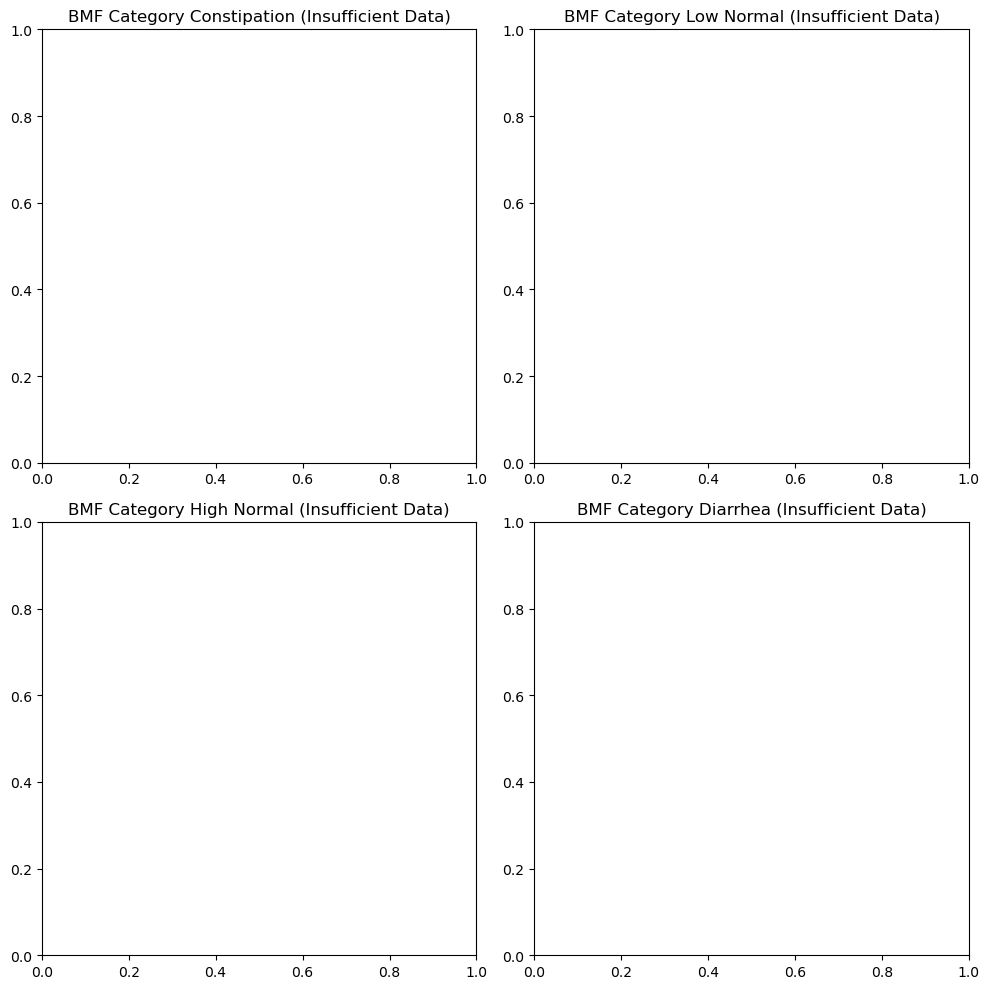

In [12]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=bowel.drop(columns='days_in_program'), 
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','eGFR','bowel']]

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Read the data from the table
df = merged_df

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "bowel"]).head(2)


# Extract dataframes for each BMF category
category_dataframes = [
    df_grouped[df_grouped["bowel"] == category] for category in range(1, 5)
]

# Initialize lists to store data for boxplots and trajectories
categories = []
public_client_ids = []
bmf = ['Constipation','Low Normal','High Normal', 'Diarrhea']

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    pcs_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "bowel"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["eGFR"].iloc[0])
            t2_data.append(group["eGFR"].iloc[1])
            categories.append(group["bowel"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            pcs_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"BMF Category {bmf[i]} (Insufficient Data)")
        continue
            
    # Perform paired t-tests and print p-values (optional)
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
        
    # Perform paired t-tests and print p-values (optional)
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, pcs_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.3)
    print("N = ",len(pcs_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"BMF Category {bmf[i]}")
    ax.set_ylabel("eGFR")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig.tight_layout()
plt.show()

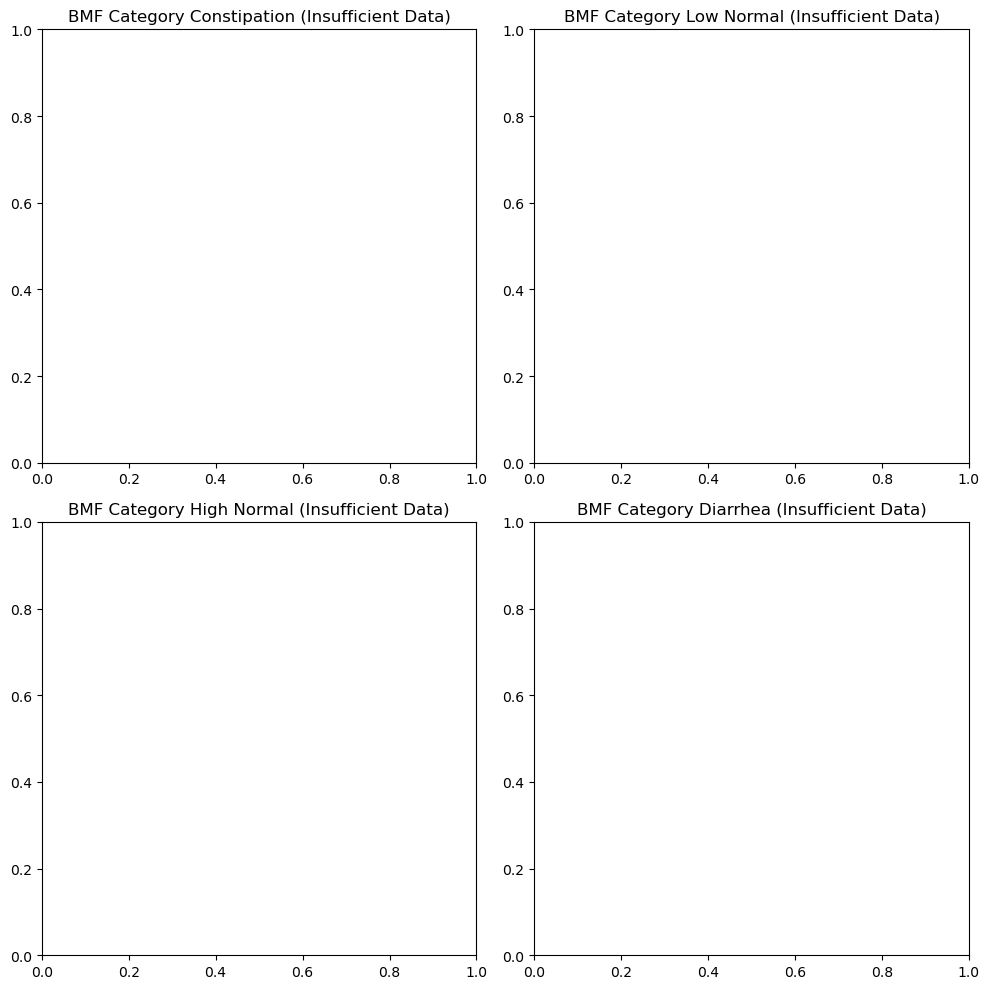

In [17]:
merged_df = pd.merge(left=rawmet.drop(columns='days_in_program'), right=bowel.drop(columns='days_in_program'), 
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','p-cresol sulfate','bowel']]

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Read the data from the table
df = merged_df

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "bowel"]).head(2)


# Extract dataframes for each BMF category
category_dataframes = [
    df_grouped[df_grouped["bowel"] == category] for category in range(1, 5)
]

# Initialize lists to store data for boxplots and trajectories
categories = []
public_client_ids = []
bmf = ['Constipation','Low Normal','High Normal', 'Diarrhea']

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    pcs_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "bowel"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["p-cresol sulfate"].iloc[0])
            t2_data.append(group["p-cresol sulfate"].iloc[1])
            categories.append(group["bowel"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            pcs_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"BMF Category {bmf[i]} (Insufficient Data)")
        continue
            
    # Perform paired t-tests and print p-values (optional)
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
        
    # Perform paired t-tests and print p-values (optional)
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, pcs_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.3)
    print("N = ",len(pcs_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"BMF Category {bmf[i]}")
    ax.set_ylabel("p-cresol sulfate")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig.tight_layout()
plt.show()

P-value for paired t-test for Constipation: nan
N =  2
P-value for paired t-test for Low Normal: nan
N =  52
P-value for paired t-test for High Normal: nan
N =  179
P-value for paired t-test for Diarrhea: nan
N =  1


/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


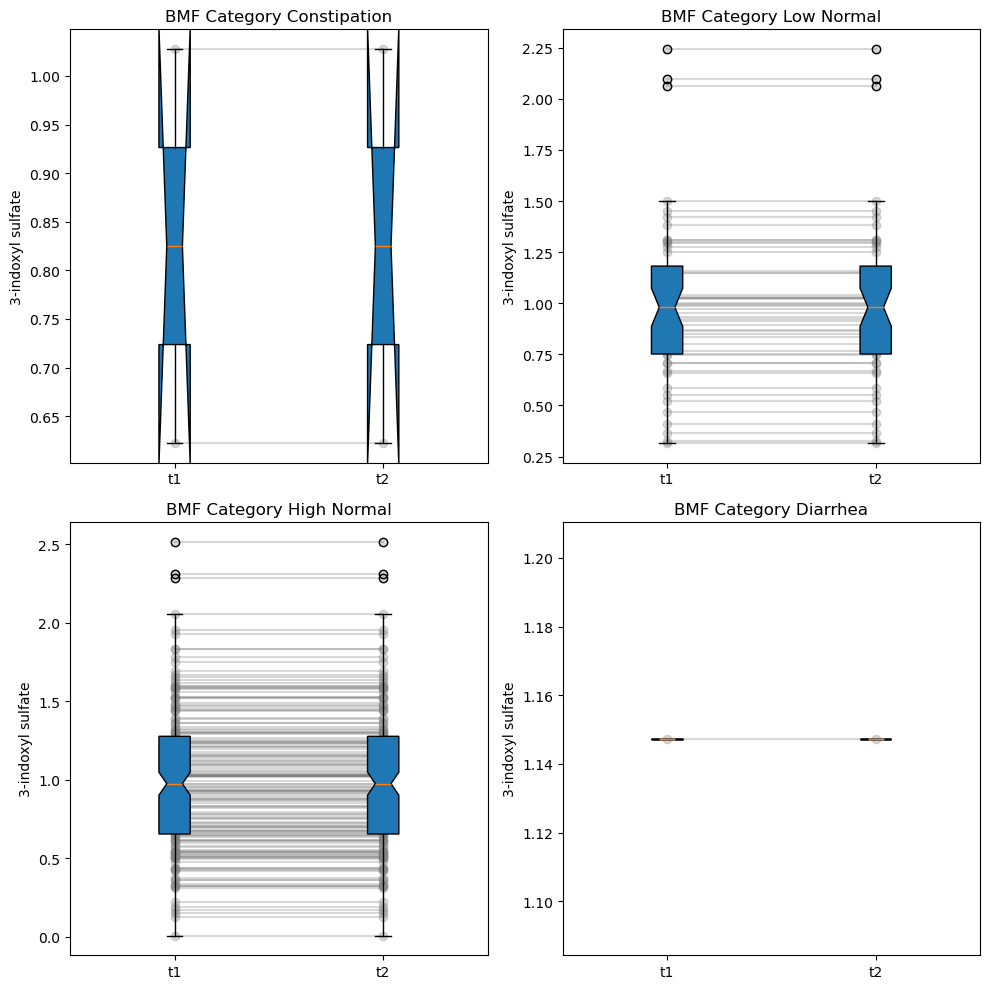

In [13]:
merged_df = pd.merge(left=rawmet.drop(columns='days_in_program'), right=bowel.drop(columns='days_in_program'), 
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','3-indoxyl sulfate','bowel']]

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Read the data from the table
df = merged_df

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "bowel"]).head(2)


# Extract dataframes for each BMF category
category_dataframes = [
    df_grouped[df_grouped["bowel"] == category] for category in range(1, 5)
]

# Initialize lists to store data for boxplots and trajectories
categories = []
public_client_ids = []
bmf = ['Constipation','Low Normal','High Normal', 'Diarrhea']

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    pcs_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "bowel"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["3-indoxyl sulfate"].iloc[0])
            t2_data.append(group["3-indoxyl sulfate"].iloc[1])
            categories.append(group["bowel"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            pcs_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"BMF Category {bmf[i]} (Insufficient Data)")
        continue
            
    # Perform paired t-tests and print p-values (optional)
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
        
    # Perform paired t-tests and print p-values (optional)
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, pcs_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.3)
    print("N = ",len(pcs_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"BMF Category {bmf[i]}")
    ax.set_ylabel("3-indoxyl sulfate")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig.tight_layout()
plt.show()

P-value for paired t-test for Constipation: nan
N =  2
P-value for paired t-test for Low Normal: nan
N =  52
P-value for paired t-test for High Normal: nan
N =  179
P-value for paired t-test for Diarrhea: nan
N =  1


/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


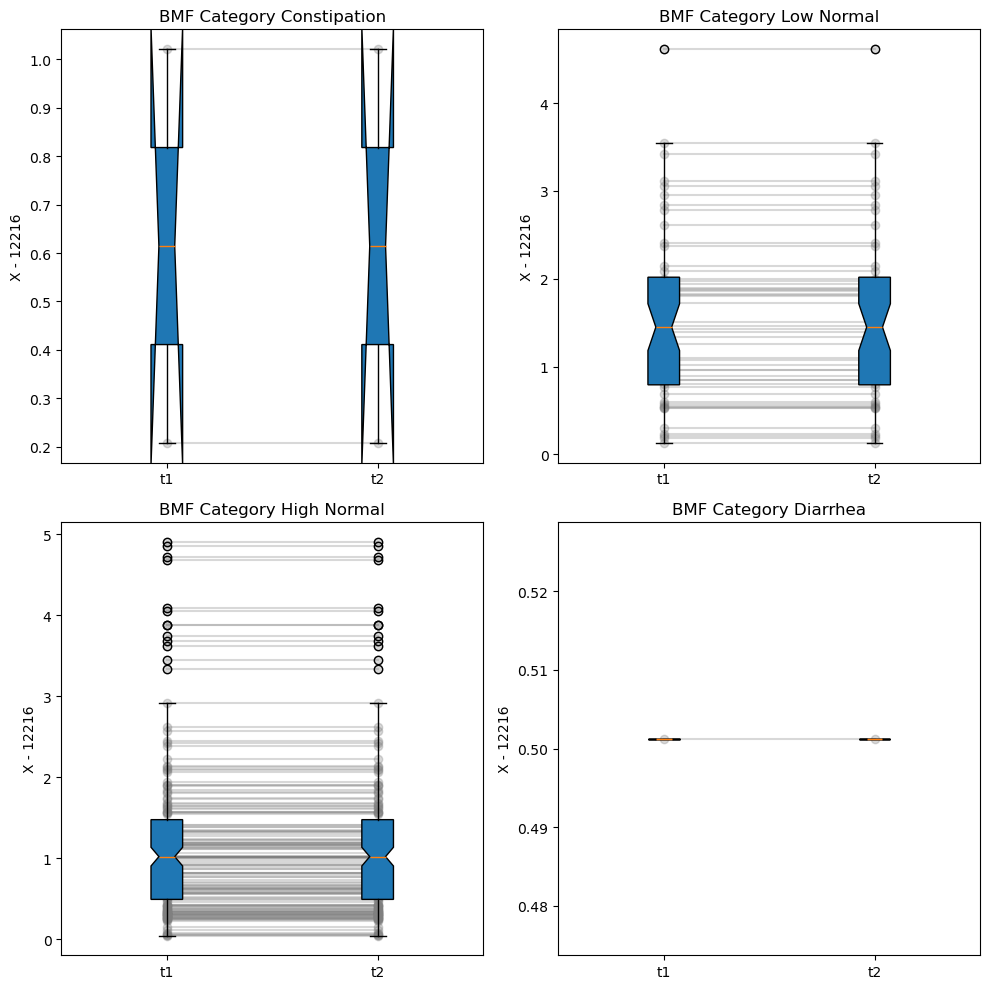

In [14]:
merged_df = pd.merge(left=rawmet.drop(columns='days_in_program'), right=bowel.drop(columns='days_in_program'), 
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','X - 12216','bowel']]

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Read the data from the table
df = merged_df

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "bowel"]).head(2)


# Extract dataframes for each BMF category
category_dataframes = [
    df_grouped[df_grouped["bowel"] == category] for category in range(1, 5)
]

# Initialize lists to store data for boxplots and trajectories
categories = []
public_client_ids = []
bmf = ['Constipation','Low Normal','High Normal', 'Diarrhea']

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    pcs_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "bowel"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["X - 12216"].iloc[0])
            t2_data.append(group["X - 12216"].iloc[1])
            categories.append(group["bowel"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            pcs_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"BMF Category {bmf[i]} (Insufficient Data)")
        continue
            
    # Perform paired t-tests and print p-values (optional)
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
        
    # Perform paired t-tests and print p-values (optional)
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, pcs_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.3)
    print("N = ",len(pcs_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"BMF Category {bmf[i]}")
    ax.set_ylabel("X - 12216")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig.tight_layout()
plt.show()

P-value for paired t-test for Constipation: nan
N =  2
P-value for paired t-test for Low Normal: nan
N =  52
P-value for paired t-test for High Normal: nan
N =  179
P-value for paired t-test for Diarrhea: nan
N =  1


/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/users/jajohnso/miniconda3/envs/arivale-py/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


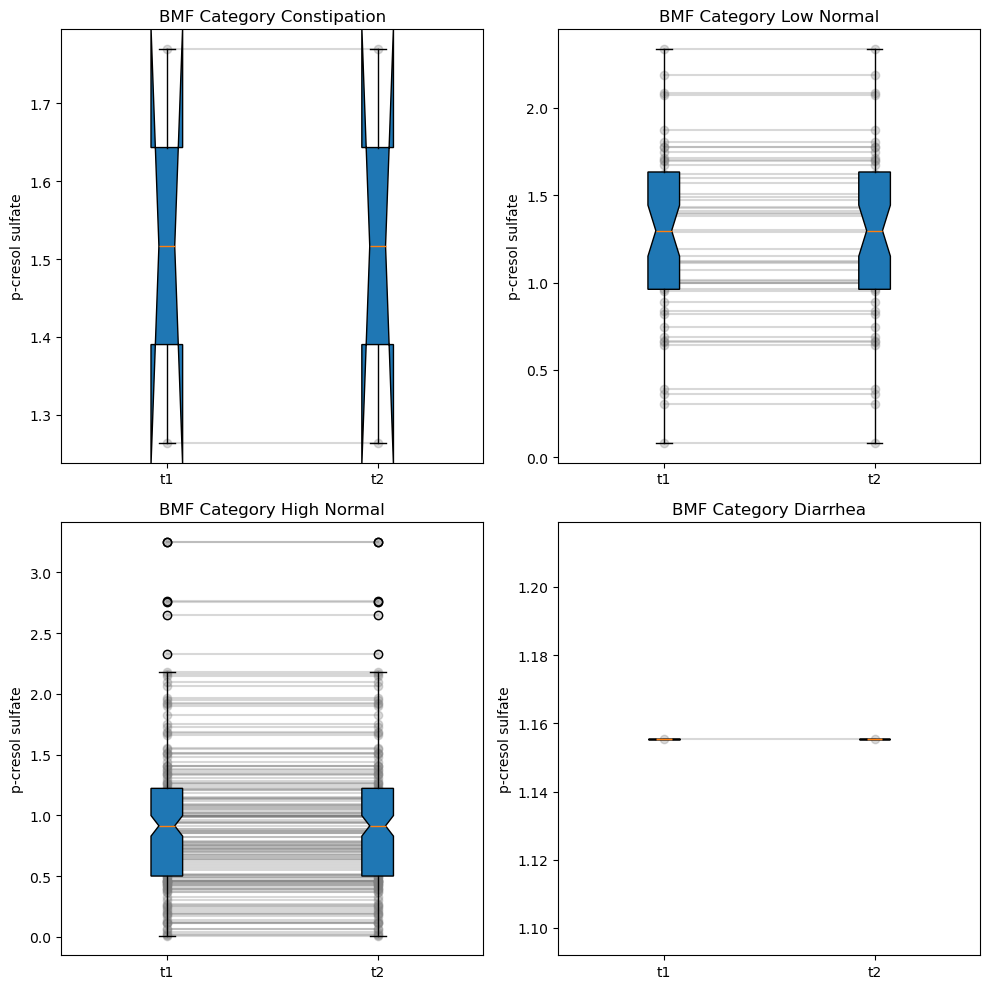

In [15]:
merged_df = pd.merge(left=rawmet.drop(columns='days_in_program'), right=bowel.drop(columns='days_in_program'), 
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','p-cresol sulfate','bowel']]

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Read the data from the table
df = merged_df

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "bowel"]).head(2)


# Extract dataframes for each BMF category
category_dataframes = [
    df_grouped[df_grouped["bowel"] == category] for category in range(1, 5)
]

# Initialize lists to store data for boxplots and trajectories
categories = []
public_client_ids = []
bmf = ['Constipation','Low Normal','High Normal', 'Diarrhea']

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    pcs_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "bowel"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["p-cresol sulfate"].iloc[0])
            t2_data.append(group["p-cresol sulfate"].iloc[1])
            categories.append(group["bowel"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            pcs_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"BMF Category {bmf[i]} (Insufficient Data)")
        continue
            
    # Perform paired t-tests and print p-values (optional)
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
        
    # Perform paired t-tests and print p-values (optional)
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, pcs_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.3)
    print("N = ",len(pcs_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"BMF Category {bmf[i]}")
    ax.set_ylabel("p-cresol sulfate")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig.tight_layout()
plt.show()

/tmp/ipykernel_1492426/1992826602.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped.loc[PCS_value, 'p-cresol sulfate_cat'] = 'IQR2'
/tmp/ipykernel_1492426/1992826602.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'IQR2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_grouped.loc[PCS_value, 'p-cresol sulfate_cat'] = 'IQR2'


P-value for paired t-test for IQR1: 0.3628
N =  166
P-value for paired t-test for IQR2: 0.8266
N =  166
P-value for paired t-test for IQR3: 0.3628
N =  166
P-value for paired t-test for IQR4: 0.6292
N =  704


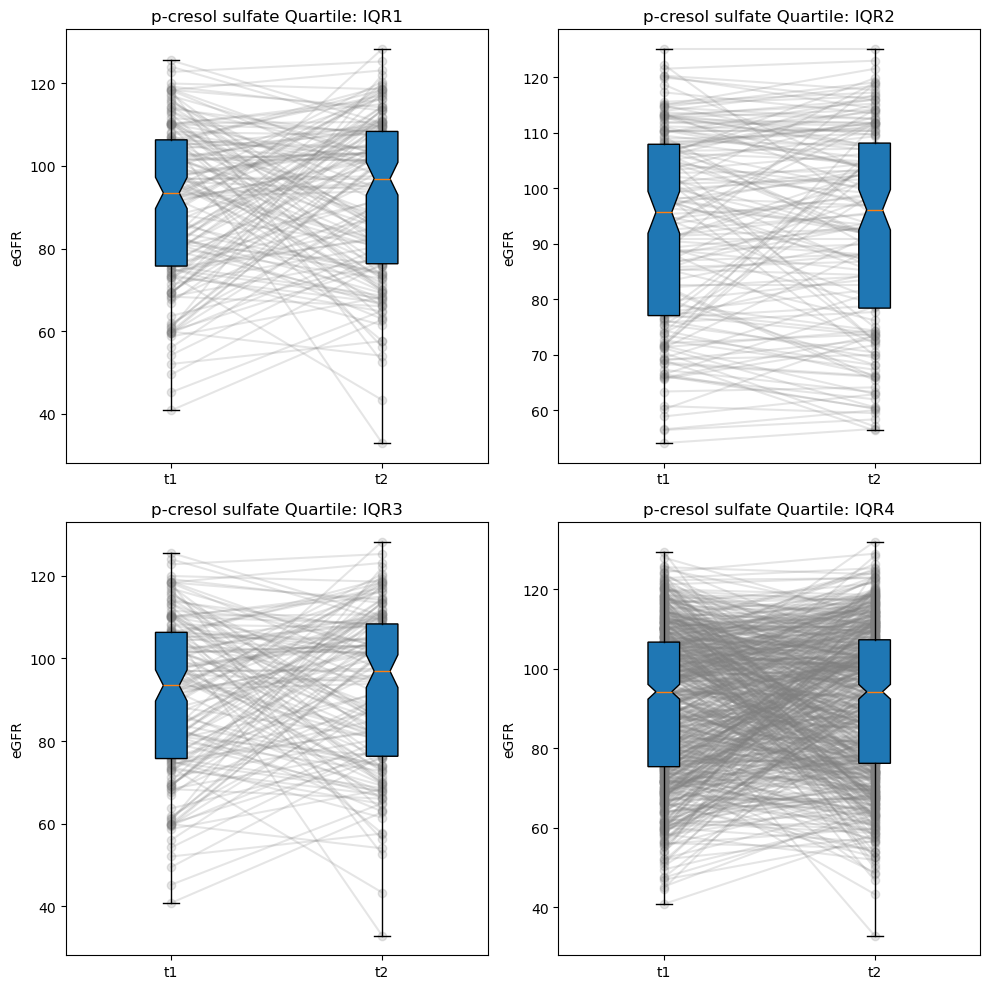

In [123]:
merged_df = pd.merge(left=eGFR, right=rawmet, 
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=eGFR, right=rawmet, 
                   # how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','p-cresol sulfate','eGFR']]

# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "p-cresol sulfate"]).head(2)

# PCS data processing and quartile calculation
for _, category_dataframe in df_grouped.groupby(['public_client_id']):
  q1,q2,q3 = np.percentile(category_dataframe['p-cresol sulfate'],[25,50,75])
  for PCS_value, *_ in category_dataframe.itertuples():
    if _[1] < q1:
      df_grouped.loc[PCS_value, 'p-cresol sulfate_cat'] = 'IQR1'
    elif q1 <= _[1] < q2:
      df_grouped.loc[PCS_value, 'p-cresol sulfate_cat'] = 'IQR2'
    elif q2 <= _[1] < q3:
      df_grouped.loc[PCS_value, 'p-cresol sulfate_cat'] = 'IQR3'
    else:
      df_grouped.loc[PCS_value, 'p-cresol sulfate_cat'] = 'IQR4'

df_grouped = df_grouped.groupby(['public_client_id','p-cresol sulfate_cat']).head(2)


# Extract dataframes for each PCS category
category_dataframes = [
    df_grouped[df_grouped["p-cresol sulfate_cat"] == category] for category in ['IQR1','IQR2','IQR3','IQR4']
]


# Initialize lists to store data for boxplots and trajectories
bmf = ['IQR1','IQR2','IQR3','IQR4']

# Create the figure and subplots
fig3, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    categories = []
    public_client_ids = []
    egfr_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "p-cresol sulfate_cat"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["eGFR"].iloc[0])
            t2_data.append(group["eGFR"].iloc[1])
            categories.append(group["p-cresol sulfate_cat"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            egfr_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"p-cresol sulfate IQR: {bmf[i]} (Insufficient Data)")
        continue
        
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
    
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, egfr_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.2)
    print("N = ",len(egfr_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"p-cresol sulfate Quartile: {bmf[i]}")
    ax.set_ylabel("eGFR")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig3.tight_layout()
plt.show()
  

/tmp/ipykernel_1492426/3248127179.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped.loc[PCS_value, '3-indoxyl sulfate_cat'] = 'IQR2'
/tmp/ipykernel_1492426/3248127179.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'IQR2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_grouped.loc[PCS_value, '3-indoxyl sulfate_cat'] = 'IQR2'


P-value for paired t-test for IQR1: 0.4227
N =  167
P-value for paired t-test for IQR2: 0.8445
N =  165
P-value for paired t-test for IQR3: 0.4227
N =  167
P-value for paired t-test for IQR4: 0.6254
N =  704


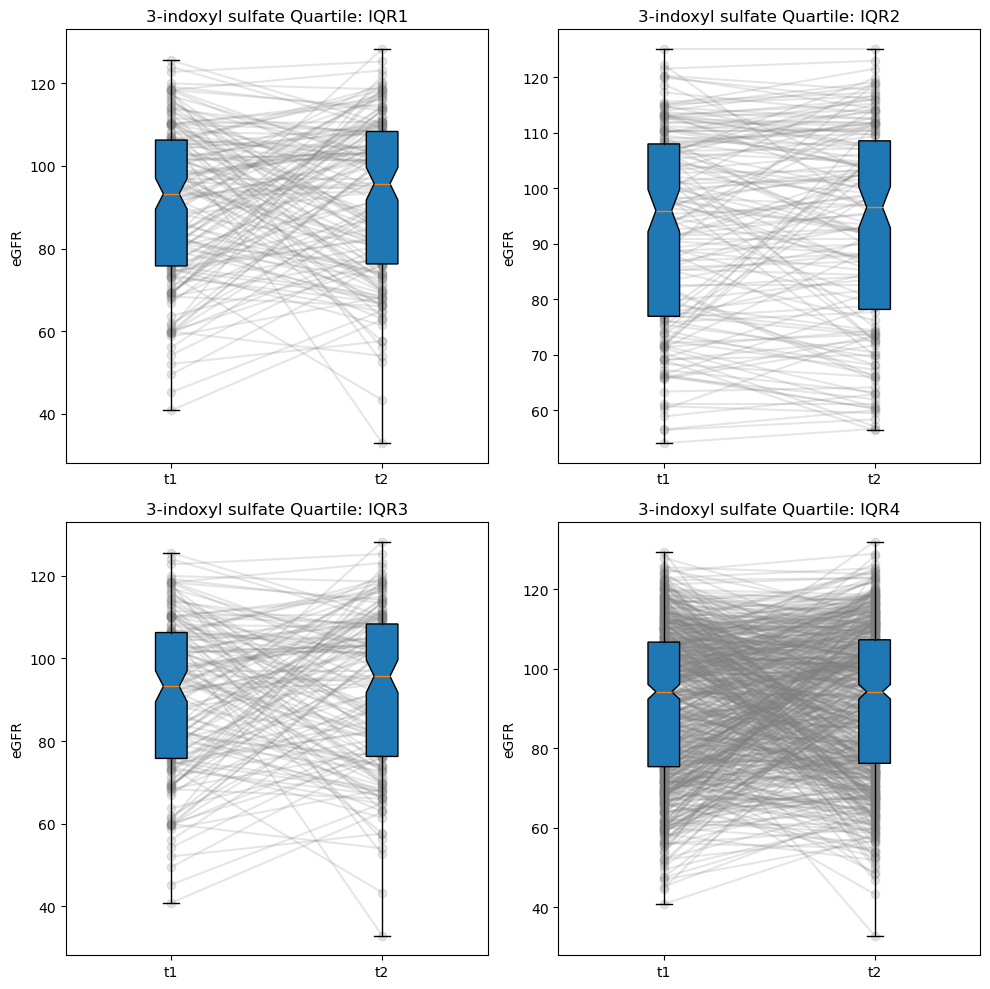

In [124]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=eGFR, right=rawmet, 
                   # how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','3-indoxyl sulfate','eGFR']]

# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "3-indoxyl sulfate"]).head(2)

# PCS data processing and quartile calculation
for _, category_dataframe in df_grouped.groupby(['public_client_id']):
  q1,q2,q3 = np.percentile(category_dataframe['3-indoxyl sulfate'],[25,50,75])
  for PCS_value, *_ in category_dataframe.itertuples():
    if _[1] < q1:
      df_grouped.loc[PCS_value, '3-indoxyl sulfate_cat'] = 'IQR1'
    elif q1 <= _[1] < q2:
      df_grouped.loc[PCS_value, '3-indoxyl sulfate_cat'] = 'IQR2'
    elif q2 <= _[1] < q3:
      df_grouped.loc[PCS_value, '3-indoxyl sulfate_cat'] = 'IQR3'
    else:
      df_grouped.loc[PCS_value, '3-indoxyl sulfate_cat'] = 'IQR4'

df_grouped = df_grouped.groupby(['public_client_id','3-indoxyl sulfate_cat']).head(2)


# Extract dataframes for each PCS category
category_dataframes = [
    df_grouped[df_grouped["3-indoxyl sulfate_cat"] == category] for category in ['IQR1','IQR2','IQR3','IQR4']
]


# Initialize lists to store data for boxplots and trajectories
bmf = ['IQR1','IQR2','IQR3','IQR4']

# Create the figure and subplots
fig3, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    categories = []
    public_client_ids = []
    egfr_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "3-indoxyl sulfate_cat"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["eGFR"].iloc[0])
            t2_data.append(group["eGFR"].iloc[1])
            categories.append(group["3-indoxyl sulfate_cat"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            egfr_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"3-indoxyl sulfate IQR: {bmf[i]} (Insufficient Data)")
        continue
        
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
    
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, egfr_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.2)
    print("N = ",len(egfr_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"3-indoxyl sulfate Quartile: {bmf[i]}")
    ax.set_ylabel("eGFR")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig3.tight_layout()
plt.show()
  

/tmp/ipykernel_1492426/3522412311.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped.loc[PCS_value, 'X - 12216_cat'] = 'IQR2'
/tmp/ipykernel_1492426/3522412311.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'IQR2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_grouped.loc[PCS_value, 'X - 12216_cat'] = 'IQR2'


P-value for paired t-test for IQR1: 0.3384
N =  164
P-value for paired t-test for IQR2: 0.8552
N =  165
P-value for paired t-test for IQR3: 0.3384
N =  164
P-value for paired t-test for IQR4: 0.6280
N =  704


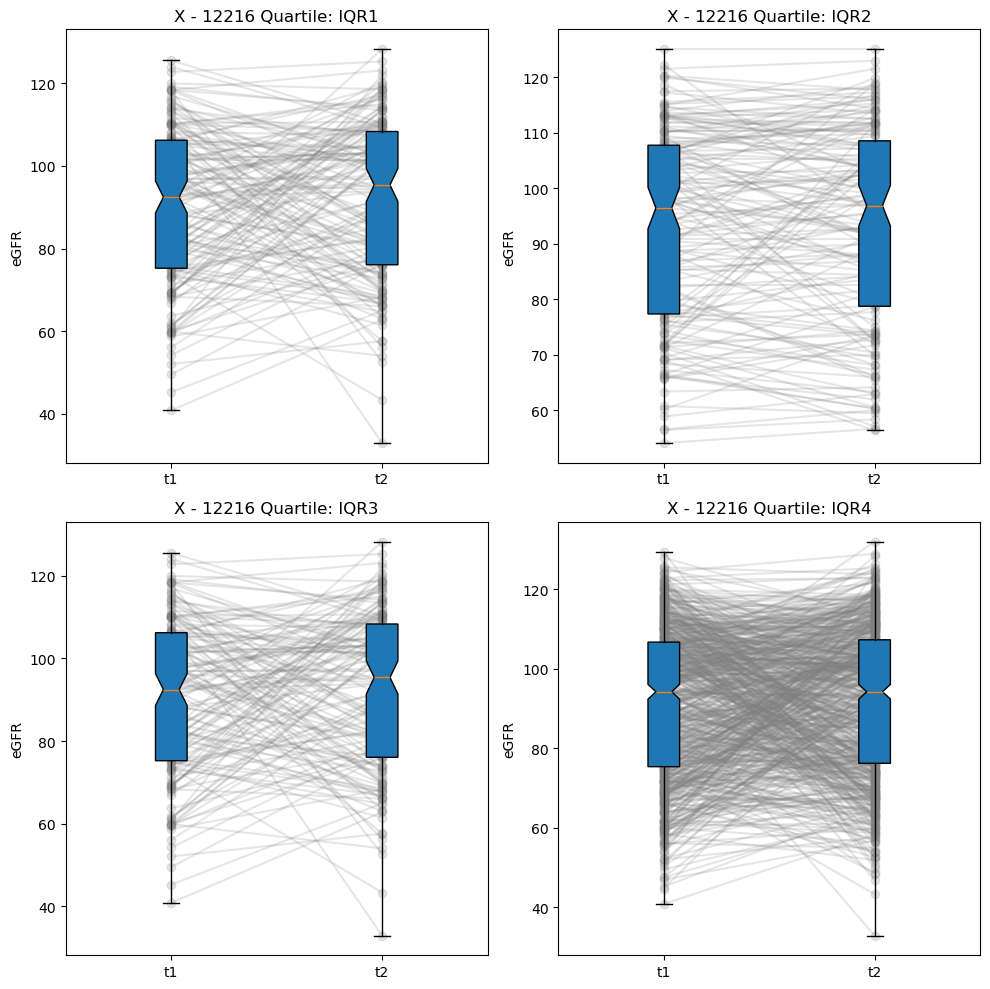

In [125]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=eGFR, right=rawmet, 
                   # how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','X - 12216','eGFR']]

# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "X - 12216"]).head(2)

# PCS data processing and quartile calculation
for _, category_dataframe in df_grouped.groupby(['public_client_id']):
  q1,q2,q3 = np.percentile(category_dataframe['X - 12216'],[25,50,75])
  for PCS_value, *_ in category_dataframe.itertuples():
    if _[1] < q1:
      df_grouped.loc[PCS_value, 'X - 12216_cat'] = 'IQR1'
    elif q1 <= _[1] < q2:
      df_grouped.loc[PCS_value, 'X - 12216_cat'] = 'IQR2'
    elif q2 <= _[1] < q3:
      df_grouped.loc[PCS_value, 'X - 12216_cat'] = 'IQR3'
    else:
      df_grouped.loc[PCS_value, 'X - 12216_cat'] = 'IQR4'

df_grouped = df_grouped.groupby(['public_client_id','X - 12216_cat']).head(2)


# Extract dataframes for each PCS category
category_dataframes = [
    df_grouped[df_grouped["X - 12216_cat"] == category] for category in ['IQR1','IQR2','IQR3','IQR4']
]


# Initialize lists to store data for boxplots and trajectories
bmf = ['IQR1','IQR2','IQR3','IQR4']

# Create the figure and subplots
fig3, axes = plt.subplots(2, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    categories = []
    public_client_ids = []
    egfr_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "X - 12216_cat"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["eGFR"].iloc[0])
            t2_data.append(group["eGFR"].iloc[1])
            categories.append(group["X - 12216_cat"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            egfr_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"X - 12216 IQR: {bmf[i]} (Insufficient Data)")
        continue
        
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
    
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, egfr_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.2)
    print("N = ",len(egfr_differences))
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"X - 12216 Quartile: {bmf[i]}")
    ax.set_ylabel("eGFR")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig3.tight_layout()
plt.show()
  

/tmp/ipykernel_1492426/4264671357.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped.loc[PCS_value, 'Percentile'] = 'Other'
/tmp/ipykernel_1492426/4264671357.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_grouped.loc[PCS_value, 'Percentile'] = 'Other'


P-value for paired t-test for 90th: 0.6862
P-value for paired t-test for Other: 0.6792


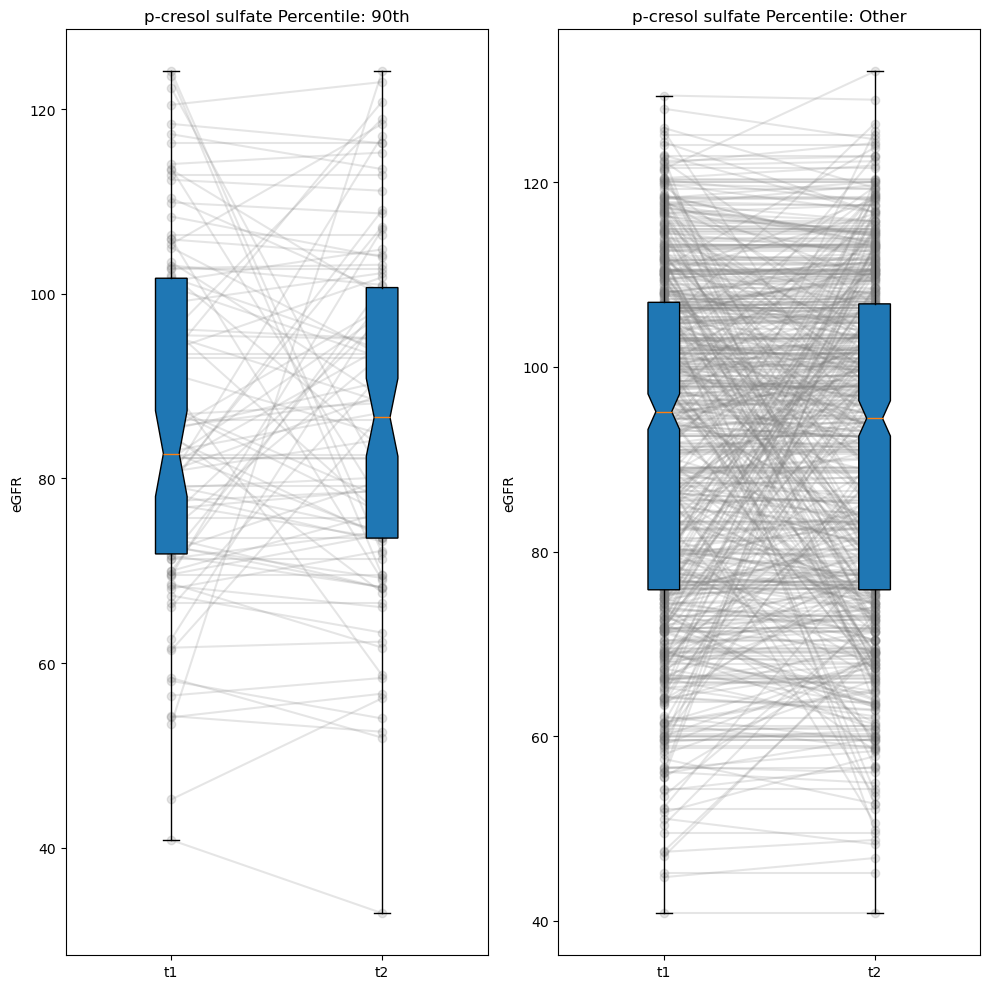

In [126]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','p-cresol sulfate','eGFR']]

# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "p-cresol sulfate"]).head(2)

# PCS data processing and quartile calculation
q = np.percentile(df_grouped['p-cresol sulfate'],[90])
for _, category_dataframe in df_grouped.groupby(['public_client_id']):
  #print(category_dataframe)
  for PCS_value, *_ in category_dataframe.itertuples():
    if _[1] >= q:
      df_grouped.loc[PCS_value, 'Percentile'] = '90th'
    else:
      df_grouped.loc[PCS_value, 'Percentile'] = 'Other'

#df_grouped = df_grouped.groupby(['public_client_id','PCS_cat']).head(2)

# Extract dataframes for each PCS category
category_dataframes = [
    df_grouped[df_grouped["Percentile"] == category] for category in ['90th','Other']
]


# Initialize lists to store data for boxplots and trajectories
bmf = ['90th','Other']

# Create the figure and subplots
fig2, axes = plt.subplots(1, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    categories = []
    public_client_ids = []
    egfr_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "Percentile"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["eGFR"].iloc[0])
            t2_data.append(group["eGFR"].iloc[1])
            categories.append(group["Percentile"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            egfr_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"p-cresol sulfate IQR: {bmf[i]} (Insufficient Data)")
        continue
        
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
    
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, egfr_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.2)
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"p-cresol sulfate Percentile: {bmf[i]}")
    ax.set_ylabel("eGFR")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig2.tight_layout()
plt.show()

/tmp/ipykernel_1492426/687793112.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped.loc[PCS_value, 'Percentile'] = 'Other'
/tmp/ipykernel_1492426/687793112.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_grouped.loc[PCS_value, 'Percentile'] = 'Other'


P-value for paired t-test for 90th: 0.2977
P-value for paired t-test for Other: 0.9962


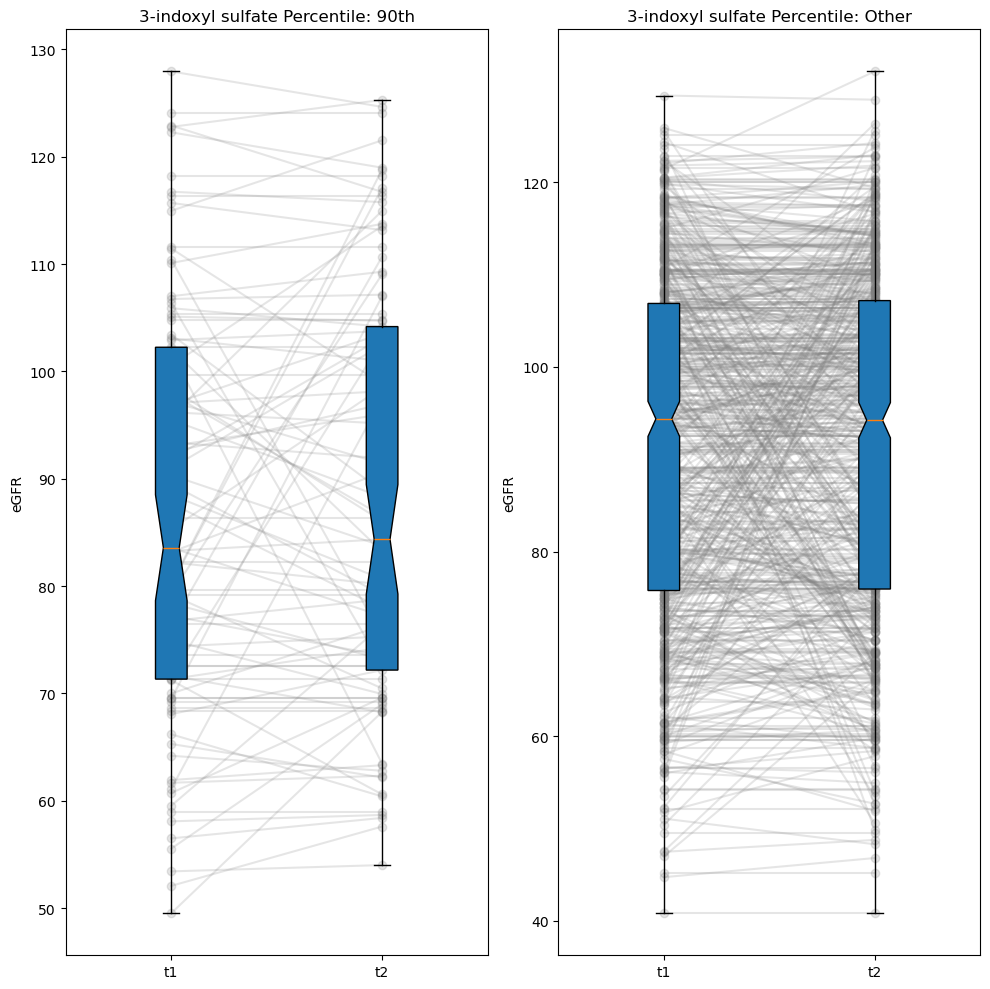

In [127]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','3-indoxyl sulfate','eGFR']]

# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "3-indoxyl sulfate"]).head(2)

# PCS data processing and quartile calculation
q = np.percentile(df_grouped['3-indoxyl sulfate'],[90])
for _, category_dataframe in df_grouped.groupby(['public_client_id']):
  #print(category_dataframe)
  for PCS_value, *_ in category_dataframe.itertuples():
    if _[1] >= q:
      df_grouped.loc[PCS_value, 'Percentile'] = '90th'
    else:
      df_grouped.loc[PCS_value, 'Percentile'] = 'Other'

#df_grouped = df_grouped.groupby(['public_client_id','PCS_cat']).head(2)

# Extract dataframes for each PCS category
category_dataframes = [
    df_grouped[df_grouped["Percentile"] == category] for category in ['90th','Other']
]


# Initialize lists to store data for boxplots and trajectories
bmf = ['90th','Other']

# Create the figure and subplots
fig2, axes = plt.subplots(1, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    categories = []
    public_client_ids = []
    egfr_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "Percentile"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["eGFR"].iloc[0])
            t2_data.append(group["eGFR"].iloc[1])
            categories.append(group["Percentile"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            egfr_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"3-indoxyl sulfate IQR: {bmf[i]} (Insufficient Data)")
        continue
        
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
    
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, egfr_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.2)
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"3-indoxyl sulfate Percentile: {bmf[i]}")
    ax.set_ylabel("eGFR")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig2.tight_layout()
plt.show()

/tmp/ipykernel_1492426/3919836523.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped.loc[PCS_value, 'Percentile'] = 'Other'
/tmp/ipykernel_1492426/3919836523.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_grouped.loc[PCS_value, 'Percentile'] = 'Other'


P-value for paired t-test for 90th: 0.7642
P-value for paired t-test for Other: 0.9553


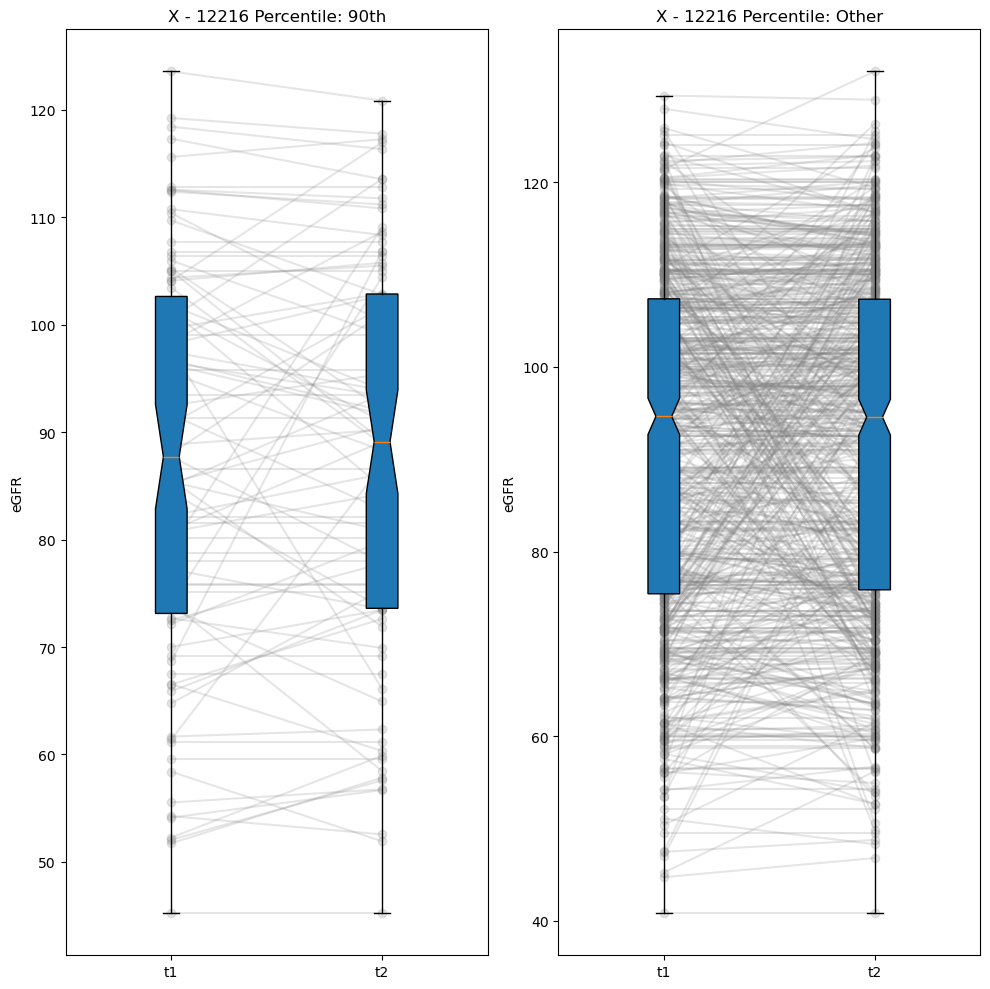

In [128]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])
merged_df = merged_df[['public_client_id','X - 12216','eGFR']]

# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id", "X - 12216"]).head(2)

# PCS data processing and quartile calculation
q = np.percentile(df_grouped['X - 12216'],[90])
for _, category_dataframe in df_grouped.groupby(['public_client_id']):
  #print(category_dataframe)
  for PCS_value, *_ in category_dataframe.itertuples():
    if _[1] >= q:
      df_grouped.loc[PCS_value, 'Percentile'] = '90th'
    else:
      df_grouped.loc[PCS_value, 'Percentile'] = 'Other'

#df_grouped = df_grouped.groupby(['public_client_id','PCS_cat']).head(2)

# Extract dataframes for each PCS category
category_dataframes = [
    df_grouped[df_grouped["Percentile"] == category] for category in ['90th','Other']
]


# Initialize lists to store data for boxplots and trajectories
bmf = ['90th','Other']

# Create the figure and subplots
fig2, axes = plt.subplots(1, 2, figsize=(10, 10))

# Iterate through each category dataframe and corresponding category number
for i, (category_dataframe, ax) in enumerate(zip(category_dataframes, axes.flatten())):
    t1_data = []
    t2_data = [] 
    categories = []
    public_client_ids = []
    egfr_differences = []
    # Extract data and metadata for each group with length check
    for _, group in category_dataframe.groupby(["public_client_id", "Percentile"]):
        # Ensure group length is >= 2 before accessing elements
        if len(group) >= 2:
            t1_data.append(group["eGFR"].iloc[0])
            t2_data.append(group["eGFR"].iloc[1])
            categories.append(group["Percentile"].iloc[0])
            public_client_ids.append(group["public_client_id"].iloc[0])
            egfr_differences.append(t2_data[-1] - t1_data[-1])

    # Skip plotting if insufficient data in category
    if len(t1_data) == 0:
        ax.set_title(f"X - 12216 IQR: {bmf[i]} (Insufficient Data)")
        continue
        
    # Convert lists to numpy arrays
    t1_data = np.array(t1_data)
    t2_data = np.array(t2_data)

    # Remove nan values
    non_nan_indicest1 = ~np.isnan(t1_data)
    non_nan_indicest2 = ~np.isnan(t2_data)
    t1_data = t1_data[non_nan_indicest1]
    t2_data = t2_data[non_nan_indicest2]

    # truncate to shorter vector length: t1_data or t2_data
    shorter_length = min(len(t1_data), len(t2_data))
    t1_data = t1_data[:shorter_length]
    t2_data = t2_data[:shorter_length]
    
    _, pvalue = ttest_rel(t1_data, t2_data)
    print(f"P-value for paired t-test for {bmf[i]}: {pvalue:.4f}")
    
    for j, (t1, t2, difference) in enumerate(zip(t1_data, t2_data, egfr_differences)):
    # Choose color based on difference
        line_color = "gray"
        # Plot the line with the chosen color
        ax.plot([-0.5, 0.5], [t1, t2], marker="o", linestyle="-", color=line_color, alpha=0.2)
    ax.boxplot([t1_data, t2_data], vert=True, patch_artist=True, notch=True, labels=["t1", "t2"], positions=[-0.5,0.5])
    
    # Customize and format the subplot
    ax.set_title(f"X - 12216 Percentile: {bmf[i]}")
    ax.set_ylabel("eGFR")
    ax.set_xticks([-0.5, 0.5])
    ax.set_xticklabels(["t1", "t2"])
    # Comment out or remove the following line to remove the legend
    # ax.legend()

# Adjust subplot layout and show the plot
fig2.tight_layout()
plt.show()

In [38]:
merged_df

,public_client_id,sex,age,BMI_CALC,bowel,eGFR,CRP HIGH SENSITIVITY,LDL-CHOL CALCULATION,GLYCOHEMOGLOBIN A1C,PC1,PC2,PC3,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310
0,01001621,F,54.0,23.294675,2,69.439409,1.92,114.0,5.6,0.006223,-0.001662,-0.003846,1.111166,1.185607,1.102880,0.962768,1.110563,0.379110,1.070360,0.943939,0.728898
1,01001621,F,54.0,23.294675,2,81.363455,1.92,114.0,5.6,0.006223,-0.001662,-0.003846,1.111166,1.185607,1.102880,0.962768,1.110563,0.379110,1.070360,0.943939,0.728898
2,01003555,M,47.0,28.478009,2,63.708606,0.93,175.0,5.3,0.005454,0.000611,0.001801,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
3,01003555,M,47.0,28.478009,2,76.368321,0.93,175.0,5.3,0.005454,0.000611,0.001801,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
4,01003555,M,47.0,28.478009,2,55.518937,0.93,175.0,5.3,0.005454,0.000611,0.001801,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,01998999,M,57.0,19.431420,3,99.616416,0.65,150.0,5.6,0.005907,-0.002885,-0.002731,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,0.943939,0.496691
1840,01998999,M,57.0,19.431420,3,102.082328,0.65,150.0,5.6,0.005907,-0.002885,-0.002731,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,0.943939,0.496691
1841,01998999,M,57.0,19.431420,3,99.953123,0.65,150.0,5.6,0.005907,-0.002885,-0.002731,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,0.943939,0.496691
1842,HX460562,F,48.0,46.076096,3,108.943104,9.20,134.0,6.1,0.005385,0.000626,-0.004292,0.995198,0.871674,0.874169,0.962768,1.285535,0.302774,0.658664,0.943939,1.146218


In [70]:
merged_df = pd.merge(left=biodf, right=bmi,
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=merged_df, right=bowel.drop(columns=['days_in_program']).drop_duplicates(subset='public_client_id'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=merged_df, right=eGFR.drop(columns=['days_in_program']),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=merged_df, right=blood,
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=merged_df, right=anc,
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=merged_df, right=rawmet.drop(columns=['days_in_program']),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])

# Read the data from the table
df = merged_df

# Group data by public_client_id and bowel, keeping first 2 data points
df_delta = pd.concat([df.iloc[:,0],df.iloc[:,5]], axis = 1)
df_delta['delta_eGFR'] = df_delta.groupby(["public_client_id"])['eGFR'].diff()
df_delta = df_delta.groupby('public_client_id').head(2)
df_deltafinal = df_delta[df_delta['delta_eGFR'].notna()]
merged_df = merged_df.drop_duplicates('public_client_id')

df = pd.merge(df_deltafinal,merged_df, on = ['public_client_id'])
df = df.drop(columns=['eGFR_x'])
df = df.rename(columns={'eGFR_y':'eGFR'})
df

,public_client_id,delta_eGFR,sex,age,BMI_CALC,bowel,eGFR,CRP HIGH SENSITIVITY,LDL-CHOL CALCULATION,GLYCOHEMOGLOBIN A1C,PC1,PC2,PC3,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310
0,01001621,11.924047,F,54.0,23.294675,2,69.439409,1.92,114.0,5.6,0.006223,-0.001662,-0.003846,1.111166,1.185607,1.102880,0.962768,1.110563,0.379110,1.070360,0.943939,0.728898
1,01003555,12.659715,M,47.0,28.478009,2,63.708606,0.93,175.0,5.3,0.005454,0.000611,0.001801,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
2,01004596,5.898300,F,63.0,25.916260,2,87.992715,0.67,80.0,5.5,0.006128,-0.001030,-0.004617,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,0.943939,1.012712
3,01004760,-5.196079,F,60.0,23.591831,3,78.383263,1.40,126.0,5.8,0.006333,-0.001915,-0.005023,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236,1.075741
4,01008097,-31.672275,M,60.0,31.461420,3,97.775014,0.62,120.0,5.8,0.003093,0.004443,0.011252,1.152567,1.219438,0.845272,0.886674,0.670818,1.572268,0.930410,0.830118,0.615656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,01990311,46.467384,F,35.0,25.338695,3,53.509300,0.75,56.0,5.5,0.006622,-0.001471,-0.004327,1.146171,1.135169,0.854084,2.163839,1.330376,1.243922,1.237271,2.109168,1.168489
479,01994483,5.251711,M,28.0,24.363579,3,72.512143,0.17,74.0,5.6,0.005418,0.001407,0.002054,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051,1.219472
480,01995109,2.997692,M,33.0,29.732117,2,116.842682,0.70,99.0,5.5,-0.013611,0.002397,0.061819,0.994685,0.985321,0.231070,0.751995,0.983947,0.248118,0.641178,0.479697,0.699227
481,01998999,-0.698753,M,57.0,19.431420,3,100.993545,0.65,150.0,5.6,0.005907,-0.002885,-0.002731,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,0.943939,0.496691


In [16]:
merged_df = pd.merge(left=eGFR.drop(columns=['days_in_program']), right=rawmet.sort_values(['public_client_id','days_in_program'], ascending = True).drop(columns=['days_in_program']),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])

# Read the data from the table
df = merged_df
# Group data by public_client_id and bowel, keeping first 2 data points
df_delta = pd.concat([df.iloc[:,0],df.iloc[:,1]], axis = 1)
df_delta['delta_eGFR'] = df_delta.groupby(["public_client_id"])['eGFR'].diff()
df_delta = df_delta.groupby('public_client_id').head(2)
df_deltafinal = df_delta[df_delta['delta_eGFR'].notna()]
merged_df = merged_df.drop_duplicates('public_client_id')

df = pd.merge(df_deltafinal,merged_df, on = ['public_client_id'])
df = df.drop(columns=['eGFR_x'])
df = df.rename(columns={'eGFR_y':'eGFR'})

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

print("The amount of unique N in this analysis are N = ",len(df.public_client_id.unique()))

df_reg = df
df_reg

The amount of unique N in this analysis are N =  704


,public_client_id,delta_eGFR,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310
0,01001621,11.924047,69.439409,1.111166,1.185607,1.102880,0.962768,1.110563,0.379110,1.070360,0.943939,0.728898
1,01002412,-5.624739,94.223189,1.289478,1.166231,1.411394,3.158972,2.134608,1.415805,1.038759,3.386583,0.979709
2,01003555,12.659715,63.708606,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
3,01004596,5.898300,87.992715,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,0.943939,1.012712
4,01004760,-5.196079,78.383263,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236,1.075741
...,...,...,...,...,...,...,...,...,...,...,...,...
699,01990311,46.467384,53.509300,1.146171,1.135169,0.854084,2.163839,1.330376,1.243922,1.237271,2.109168,1.168489
700,01994483,5.251711,72.512143,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051,1.219472
701,01995109,2.997692,116.842682,0.994685,0.985321,0.231070,0.751995,0.983947,0.248118,0.641178,0.479697,0.699227
702,01998999,-0.698753,100.993545,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,0.943939,0.496691


In [90]:
merged_df = pd.merge(left=eGFR.drop(columns=['days_in_program']), right=rawmet.sort_values(['public_client_id','days_in_program'], ascending = True).drop(columns=['days_in_program']),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=bowel.drop(columns=['days_in_program']), right=merged_df,
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])

# Select relevant columns for regression
df_reg = merged_df.dropna() # Drop rows with missing values

df_reg

,public_client_id,bowel,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310
0,01684342,2,71.539614,0.995377,0.842805,0.988038,0.995524,0.986584,3.942599,1.005525,1.041313,0.917729
1,01601230,3,65.236945,0.429466,0.429687,0.457422,0.129028,0.178232,0.310969,0.608273,1.041313,0.591588
2,01601230,3,66.745293,0.429466,0.429687,0.457422,0.129028,0.178232,0.310969,0.608273,1.041313,0.591588
3,01601230,3,56.781165,0.429466,0.429687,0.457422,0.129028,0.178232,0.310969,0.608273,1.041313,0.591588
4,01601230,3,65.236945,0.429466,0.429687,0.457422,0.129028,0.178232,0.310969,0.608273,1.041313,0.591588
...,...,...,...,...,...,...,...,...,...,...,...,...
2994,01595822,3,87.503235,0.888578,0.930938,0.525339,0.099652,0.860897,0.878071,0.803894,1.041313,0.743472
2995,01595822,3,90.202499,0.888578,0.930938,0.525339,0.099652,0.860897,0.878071,0.803894,1.041313,0.743472
2996,01595822,3,84.948453,0.888578,0.930938,0.525339,0.099652,0.860897,0.878071,0.803894,1.041313,0.743472
2997,01595822,3,86.208497,0.888578,0.930938,0.525339,0.099652,0.860897,0.878071,0.803894,1.041313,0.743472


The amount of unique N in this analysis are N =  572
The min and max and median of eGFR - Constipation are: 74.9528413526712 122.98110582486444 89.47671894678356
The min and max and median of eGFR - Low Normal are: 51.742519915926756 125.86895892285506 96.68728838451658
The min and max and median of eGFR - High Normal are: 40.83557572288425 129.33122271430148 95.40251300571889
The min and max ane median of eGFR - Diarrhea are: 86.90493312544601 111.56205888793244 101.62915330917768


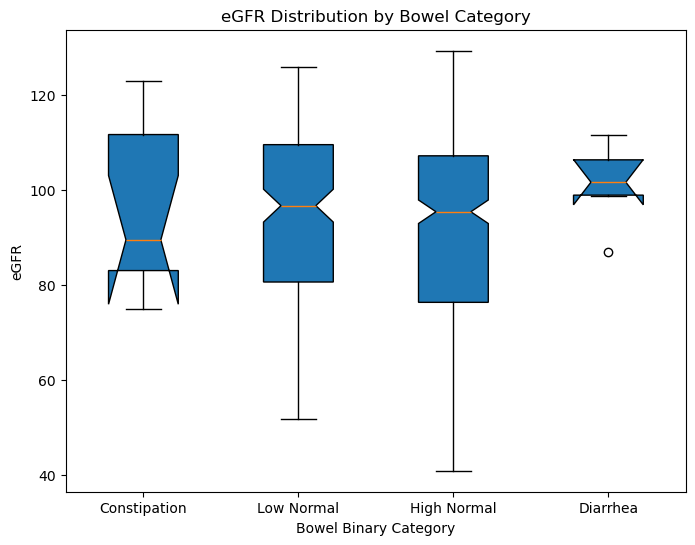

,bowel,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310
public_client_id,,,,,,,,,,,
01001621,2,69.439409,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313,0.728898
01003555,2,63.708606,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904
01004596,2,87.992715,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,1.041313,1.012712
01004760,3,78.383263,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236,1.075741
01006225,1,104.441885,2.316356,2.241564,2.479772,5.072815,3.509053,1.133372,2.301456,5.741292,1.616026
...,...,...,...,...,...,...,...,...,...,...,...
01994088,3,113.356328,0.462328,0.399505,0.988038,0.070386,0.173705,0.231107,0.365119,0.463798,0.487081
01994483,3,72.512143,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051,1.219472
01995109,2,116.842682,0.995377,0.995575,0.231070,0.751995,0.986584,0.248118,0.641178,0.479697,0.699227


In [121]:
merged_df = pd.merge(left=eGFR.drop(columns=['days_in_program']), right=rawmet.drop(columns=['days_in_program']),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=bowel.drop(columns=['days_in_program']), right=merged_df,
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])

# Select relevant columns for regression
df_reg = merged_df.dropna().set_index('public_client_id') # Drop rows with missing values

print("The amount of unique N in this analysis are N = ",len(df_reg.reset_index().public_client_id.unique()))

print("The min and max and median of eGFR - Constipation are:", min(df_reg.eGFR[df_reg.bowel == 1]), max(df_reg.eGFR[df_reg.bowel == 1]),  df_reg.eGFR[df_reg.bowel == 1].median())

print("The min and max and median of eGFR - Low Normal are:", min(df_reg.eGFR[df_reg.bowel == 2]), max(df_reg.eGFR[df_reg.bowel == 2]),  df_reg.eGFR[df_reg.bowel == 2].median())

print("The min and max and median of eGFR - High Normal are:", min(df_reg.eGFR[df_reg.bowel == 3]), max(df_reg.eGFR[df_reg.bowel == 3]),  df_reg.eGFR[df_reg.bowel == 3].mean())

print("The min and max ane median of eGFR - Diarrhea are:", min(df_reg.eGFR[df_reg.bowel == 4]), max(df_reg.eGFR[df_reg.bowel == 4]), df_reg.eGFR[df_reg.bowel == 4].mean())

# Create the boxplot]
df = df_reg
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['bowel'] == 1]['eGFR'], df[df['bowel'] == 2]['eGFR'], df[df['bowel'] == 3]['eGFR'], df[df['bowel'] == 4]['eGFR']],
            labels=['Constipation', 'Low Normal', "High Normal", "Diarrhea"],
            notch=True, vert=True, patch_artist=True)
plt.xlabel('Bowel Binary Category')
plt.ylabel('eGFR')
plt.title('eGFR Distribution by Bowel Category')
plt.show()
df_reg

The amount of unique N in this analysis are N =  572
The min and max and median and mean of eGFR - Constipation are: 74.9528413526712 122.98110582486444 89.47671894678356 96.67776064949618
The min and max and median and mean of eGFR - Low Normal are: 51.742519915926756 125.86895892285506 96.68728838451658 94.95117400658177
The min and max and median and mean of eGFR - High Normal are: 40.83557572288425 129.33122271430148 95.40251300571889 91.7939834881303
The min and max and median and mean of eGFR - Diarrhea are: 86.90493312544601 111.56205888793244 101.62915330917768 101.2717006990174


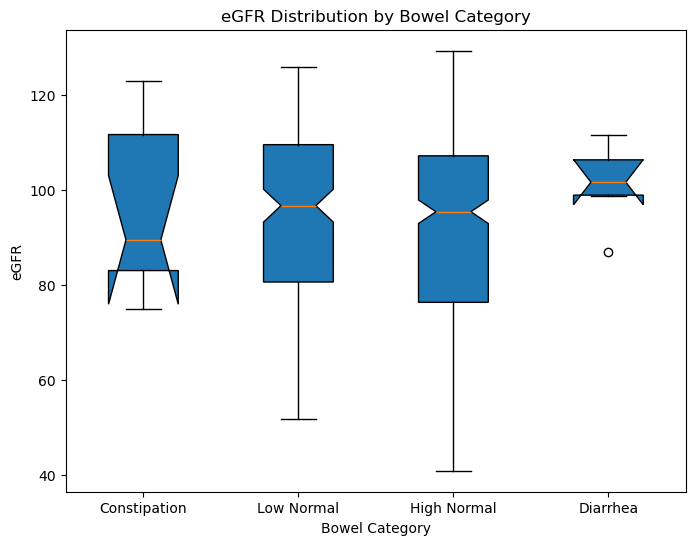

Beta Coefficients: [-3.99017027 -2.68975767  1.70762005  2.20733063 -0.44205471  0.36766299
 -1.98269624 -9.68591973  0.05272792]
Intercept: 115.07551897460424
                            OLS Regression Results                            
Dep. Variable:                   eGFR   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     5.547
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           2.42e-07
Time:                        16:29:26   Log-Likelihood:                -2465.4
No. Observations:                 572   AIC:                             4951.
Df Residuals:                     562   BIC:                             4994.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err       

,public_client_id,bowel,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310,assessment:diet:freq_meat:int,assessment:diet:freq_processed_meat:int,assessment:lifestyle:cruciferous_vegetables:enum,assessment:diet:freq_cruciferous_vegetables:int,assessment:lifestyle:vegetables:enum,assessment:diet:freq_raw_vegetables_salad:int,assessment:diet:freq_cooked_green_vegetables:int,assessment:diet:freq_cooked_root_vegetables:int
0,01001621,2,69.439409,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313,0.728898,NaN,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
1,01003555,2,63.708606,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904,NaN,NaN,(4) Less than once per month,NaN,(0) Zero/less than 1 per day,NaN,NaN,NaN
2,01004596,2,87.992715,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,1.041313,1.012712,NaN,NaN,(2) Once per week,NaN,(1) 1,NaN,NaN,NaN
3,01004760,3,78.383263,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236,1.075741,NaN,NaN,(2) Once per week,NaN,(1) 1,NaN,NaN,NaN
4,01006225,1,104.441885,2.316356,2.241564,2.479772,5.072815,3.509053,1.133372,2.301456,5.741292,1.616026,NaN,NaN,(0) Daily,NaN,(2) 2-3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,01994088,3,113.356328,0.462328,0.399505,0.988038,0.070386,0.173705,0.231107,0.365119,0.463798,0.487081,NaN,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN
568,01994483,3,72.512143,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051,1.219472,NaN,NaN,(2) Once per week,NaN,(2) 2-3,NaN,NaN,NaN
569,01995109,2,116.842682,0.995377,0.995575,0.231070,0.751995,0.986584,0.248118,0.641178,0.479697,0.699227,NaN,NaN,(1) 3-4 times per week,NaN,(3) 4-5,NaN,NaN,NaN
570,01998999,3,100.993545,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,1.041313,0.496691,NaN,NaN,(1) 3-4 times per week,NaN,(2) 2-3,NaN,NaN,NaN


In [12]:
merged_df = pd.merge(left=eGFR.drop(columns=['days_in_program']), right=rawmet.drop(columns=['days_in_program']),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
merged_df = pd.merge(left=bowel.drop(columns=['days_in_program']), right=merged_df,
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])

# Select relevant columns for regression
df_reg = merged_df.dropna() # Drop rows with missing values

print("The amount of unique N in this analysis are N = ",len(df_reg.reset_index().public_client_id.unique()))

print("The min and max and median and mean of eGFR - Constipation are:", min(df_reg.eGFR[df_reg.bowel == 1]), max(df_reg.eGFR[df_reg.bowel == 1]), df_reg.eGFR[df_reg.bowel == 1].median(),  df_reg.eGFR[df_reg.bowel == 1].mean())

print("The min and max and median and mean of eGFR - Low Normal are:", min(df_reg.eGFR[df_reg.bowel == 2]), max(df_reg.eGFR[df_reg.bowel == 2]), df_reg.eGFR[df_reg.bowel == 2].median(),  df_reg.eGFR[df_reg.bowel == 2].mean())

print("The min and max and median and mean of eGFR - High Normal are:", min(df_reg.eGFR[df_reg.bowel == 3]), max(df_reg.eGFR[df_reg.bowel == 3]), df_reg.eGFR[df_reg.bowel == 3].median(),  df_reg.eGFR[df_reg.bowel == 3].mean())

print("The min and max and median and mean of eGFR - Diarrhea are:", min(df_reg.eGFR[df_reg.bowel == 4]), max(df_reg.eGFR[df_reg.bowel == 4]), df_reg.eGFR[df_reg.bowel == 4].median(), df_reg.eGFR[df_reg.bowel == 4].mean())

# Create the boxplot]
df = df_reg
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['bowel'] == 1]['eGFR'], df[df['bowel'] == 2]['eGFR'], df[df['bowel'] == 3]['eGFR'], df[df['bowel'] == 4]['eGFR']],
            labels=['Constipation', 'Low Normal', "High Normal", "Diarrhea"],
            notch=True, vert=True, patch_artist=True)
plt.xlabel('Bowel Category')
plt.ylabel('eGFR')
plt.title('eGFR Distribution by Bowel Category')
plt.show()
df_reg

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Select desired columns
df_reg_slice = df_reg.set_index('public_client_id')
selected_columns = df_reg.columns[1:11].tolist()
df_reg_slice = df_reg[selected_columns]

# Select features and target variable
#X = df_reg_slice.drop(columns=["age"])  # Drop the original "age" column
# Create a mapping dictionary
#mapping = {1: 1, 2: 1, 3: 2, 4: 2}

# Re-encode the column using the mapping
#df_reg['bowel_binary'] = df_reg_slice['bowel'].map(mapping)
#df_reg_slice['bowel_binary'] = df_reg_slice['bowel'].map(mapping)

# One-hot encode the bowel column
#enc = OneHotEncoder(sparse=False)
#X_encoded = enc.fit_transform(df_reg_slice[['bowel_binary']])

# Add the encoded features to the DataFrame
#df_reg_slice[['bowel_1', 'bowel_2']] = X_encoded

X = df_reg_slice.drop(columns=['eGFR'])

# Calculate min and max values
min_eGFR = df_reg_slice['eGFR'].min()
max_eGFR = df_reg_slice['eGFR'].max()

from scipy.stats import rankdata

# Apply rankdata with method=‘ordinal’ to keep original order
ranks = rankdata(df_reg_slice['eGFR'], method='ordinal')

# Add ranks as a new column in DataFrame
#df_reg_slice['eGFR_ranked'] = pd.Series(ranks, index=df_reg_slice.index)

y = df_reg_slice['eGFR']
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# ... (rest of your code)

# Print the model coefficients
print("Beta Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

# We can now use the model to predict delta eGFR for new data points:
#new_data = pd.DataFrame({"PCS": [1.5], "PCG": [2.0], "PAG": [1.8], "CD": [0.8]})
#predicted_delta_eGFR = model.predict(new_data)
#print("Predicted delta eGFR:", predicted_delta_eGFR)

import statsmodels.api as sm

# Fit the model using statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary table containing raw p-values
print(model.summary())

from statsmodels.stats.multitest import multipletests

# Extract p-values from the model summary
p_values = model.pvalues

# Adjust p-values using FDR correction
fdr_results = multipletests(p_values, method="fdr_bh")

# Get the overall p-value from the F-statistic
p_value = model.f_pvalue
betas = model.params

# Get the R-squared value
r_squared = model.rsquared

print("Overall p-value:", p_value)
print("R-squared:", r_squared)
print("Betas:")
print(betas)

# Print the adjusted p-values
print("p-values:")
print(p_values)

#df = pd.merge(left=biodf, right=bmi,
   #                  how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
   #                  on=["public_client_id"])
#df = pd.merge(left=df, right=blood,
      #               how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
       #              on=["public_client_id"])
#df = pd.merge(left=df, right=anc,
             #        how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                #     on=["public_client_id"])
#df_reg = pd.merge(left=df, right=df_reg,
                   #  how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                   #  on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])

df_reg = pd.merge(df_reg, meat, on = ['public_client_id'])
df_reg = pd.merge(df_reg, veg, on = ['public_client_id'])


df_reg.to_csv('mediation.csv')

df_reg

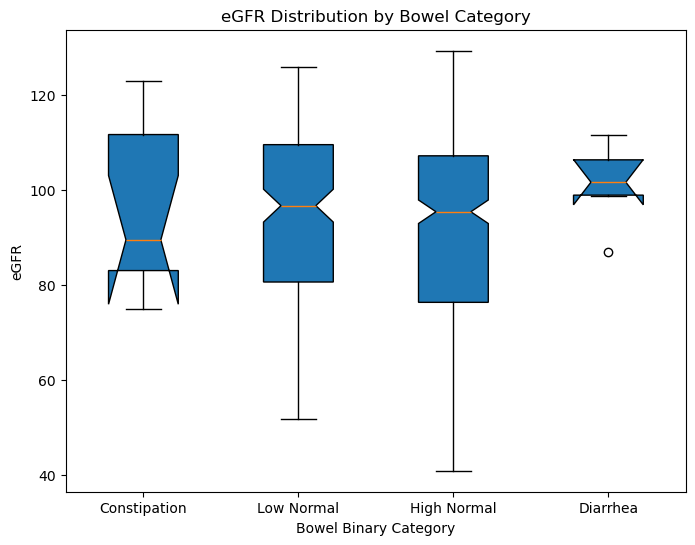

,bowel,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843
0,2,69.439409,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313
1,2,63.708606,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197
2,2,87.992715,0.654857,0.589141,0.583984,1.312403,0.577590,0.346376,0.940816,1.041313
3,3,78.383263,3.073953,2.685353,2.921561,6.334253,6.510212,1.981912,1.881202,6.318236
4,1,104.441885,2.316356,2.241564,2.479772,5.072815,3.509053,1.133372,2.301456,5.741292
...,...,...,...,...,...,...,...,...,...,...
567,3,113.356328,0.462328,0.399505,0.988038,0.070386,0.173705,0.231107,0.365119,0.463798
568,3,72.512143,1.045358,1.029528,1.299399,28.405778,0.667584,1.749237,1.667581,13.992051
569,2,116.842682,0.995377,0.995575,0.231070,0.751995,0.986584,0.248118,0.641178,0.479697
570,3,100.993545,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,1.041313


In [111]:
# Create the boxplot]
df = df_reg_slice
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['bowel'] == 1]['eGFR'], df[df['bowel'] == 2]['eGFR'], df[df['bowel'] == 3]['eGFR'], df[df['bowel'] == 4]['eGFR']],
            labels=['Constipation', 'Low Normal', "High Normal", "Diarrhea"],
            notch=True, vert=True, patch_artist=True)
plt.xlabel('Bowel Binary Category')
plt.ylabel('eGFR')
plt.title('eGFR Distribution by Bowel Category')
plt.show()
df_reg_slice

In [110]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# ... (rest of your code)

# Print the model coefficients
print("Beta Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

# We can now use the model to predict delta eGFR for new data points:
#new_data = pd.DataFrame({"PCS": [1.5], "PCG": [2.0], "PAG": [1.8], "CD": [0.8]})
#predicted_delta_eGFR = model.predict(new_data)
#print("Predicted delta eGFR:", predicted_delta_eGFR)

import statsmodels.api as sm

# Fit the model using statsmodels
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary table containing raw p-values
print(model.summary())

from statsmodels.stats.multitest import multipletests

# Extract p-values from the model summary
p_values = model.pvalues

# Adjust p-values using FDR correction
#$fdr_results = multipletests(p_values, method="fdr_bh")

# Get the overall p-value from the F-statistic
p_value = model.f_pvalue
betas = model.params

# Get the R-squared value
r_squared = model.rsquared

print("Overall p-value:", p_value)
print("R-squared:", r_squared)
print("Betas:")
print(betas)

# Print the adjusted p-values
print("p-values:")
print(p_values)

Beta Coefficients: [ 0.         -3.99017027 -2.68975767  1.70762005  2.20733063 -0.44205471
  0.36766299 -1.98269624 -9.68591973  0.05272792]
Intercept: 115.07551897460425
                            OLS Regression Results                            
Dep. Variable:                   eGFR   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     5.547
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           2.42e-07
Time:                        09:45:15   Log-Likelihood:                -2465.4
No. Observations:                 572   AIC:                             4951.
Df Residuals:                     562   BIC:                             4994.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    st

In [13]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])


# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id"]).head(2)

print("The amount of unique N in this analysis are N = ",len(df_grouped.public_client_id.unique()))

df_grouped = df_grouped.set_index('public_client_id')

# Compute delta eGFR and add it as a new column
df_grouped["delta_eGFR"] = df_grouped["eGFR"].diff()
df_grouped

The amount of unique N in this analysis are N =  705


,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310,delta_eGFR
public_client_id,,,,,,,,,,,
01001621,69.439409,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313,0.728898,NaN
01001621,69.439409,1.594857,0.995575,1.987585,0.188396,2.572598,1.647921,1.141062,1.041313,1.253127,0.000000
01002412,94.223189,1.289478,1.166231,1.411394,3.158972,2.134608,1.415805,1.038759,3.386583,0.979709,24.783780
01002412,88.598450,1.289478,1.166231,1.411394,3.158972,2.134608,1.415805,1.038759,3.386583,0.979709,-5.624739
01003555,63.708606,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904,-24.889844
...,...,...,...,...,...,...,...,...,...,...,...
01995109,116.842682,0.617083,0.760855,0.553934,0.342165,0.173366,0.568244,1.141701,0.286310,1.128484,0.000000
01998999,100.993545,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,1.041313,0.496691,-15.849137
01998999,100.993545,0.444396,0.674082,0.379807,0.186191,0.376945,0.339817,0.565163,0.136918,0.661287,0.000000


In [20]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])


# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id"]).head(2)

print("The amount of unique N in this analysis are N = ",len(df_grouped.public_client_id.unique()))
df_grouped = df_grouped.set_index('public_client_id')
df_grouped["delta_eGFR"] = df_grouped["eGFR"].diff()
df_grouped

The amount of unique N in this analysis are N =  705


,eGFR,p-cresol sulfate,X - 23997,phenylacetylglutamine,X - 11850,p-cresol glucuronide,X - 12216,3-indoxyl sulfate,X - 11843,X - 21310,delta_eGFR
public_client_id,,,,,,,,,,,
01001621,69.439409,1.111166,1.185607,1.102880,0.995524,1.110563,0.379110,1.070360,1.041313,0.728898,NaN
01001621,69.439409,1.594857,0.995575,1.987585,0.188396,2.572598,1.647921,1.141062,1.041313,1.253127,0.000000
01002412,94.223189,1.289478,1.166231,1.411394,3.158972,2.134608,1.415805,1.038759,3.386583,0.979709,24.783780
01002412,88.598450,1.289478,1.166231,1.411394,3.158972,2.134608,1.415805,1.038759,3.386583,0.979709,-5.624739
01003555,63.708606,0.992500,0.997160,0.789559,1.218001,0.854464,1.190192,1.299289,0.540197,1.205904,-24.889844
...,...,...,...,...,...,...,...,...,...,...,...
01995109,116.842682,0.617083,0.760855,0.553934,0.342165,0.173366,0.568244,1.141701,0.286310,1.128484,0.000000
01998999,100.993545,0.393642,0.564292,0.302101,0.053313,0.246140,0.250328,0.375171,1.041313,0.496691,-15.849137
01998999,100.993545,0.444396,0.674082,0.379807,0.186191,0.376945,0.339817,0.565163,0.136918,0.661287,0.000000


In [18]:
merged_df = pd.merge(left=eGFR.drop(columns='days_in_program'), right=rawmet.drop(columns='days_in_program'),
                     how="inner",  # Choose how to handle duplicates (inner, outer, left, right)
                     on=["public_client_id"])
#merged_df = pd.merge(left=merged_df, right=bowel, 
                    #how="right",  # Choose how to handle duplicates (inner, outer, left, right)
                   # on=["days_in_program","public_client_id"])


# Read the data from the table
df = merged_df

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
from pylab import plot, show, savefig, xlim, figure, ylim, legend, boxplot, setp, axes as ax
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Define function to filter data based on data point count
def filter_by_data_points(df, min_points=2):
    valid_ids = []
    for name, group in df.groupby("public_client_id"):
        if len(group) >= min_points:
            valid_ids.append(name)
    return df[df["public_client_id"].isin(valid_ids)]

# Filter data with at least 2 data points per public_client_id
df = filter_by_data_points(df)

# Group data by public_client_id and bowel, keeping first 2 data points
df_grouped = df.groupby(["public_client_id"]).head(2)

print("The amount of unique N in this analysis are N = ",len(df_grouped.public_client_id.unique()))

df_grouped = df_grouped.set_index('public_client_id')

# Compute delta eGFR and add it as a new column
df_grouped["delta_eGFR"] = df_grouped["eGFR"].diff()

# Select relevant columns for regression
df_reg = df_grouped.dropna()  # Drop rows with missing values

# One-hot encode sex
enc = OneHotEncoder(sparse=False)
X_encoded = enc.fit_transform(df_reg[["bowel"]])
df_reg_slice[["sex_M", "sex_F"]] = X_encoded

# Select features and target variable
X = df_reg_slice.drop(columns=["sex"])  # Drop the original "sex" column
y = df_reg["delta_eGFR"]

# Create the linear regression model
model = LinearRegression()

# Select both covariates and target variable for model fitting
X = df_reg[df_reg.columns[0:-1]]  # Combine covariates and other features
y = df_reg["delta_eGFR"]

model.fit(X, y)

# Print the model coefficients
print("Beta Coefficients:", model.coef_)

# Print the intercept
print("Intercept:", model.intercept_)

# We can now use the model to predict delta eGFR for new data points:
#new_data = pd.DataFrame({"PCS": [1.5], "PCG": [2.0], "PAG": [1.8], "CD": [0.8]})
#predicted_delta_eGFR = model.predict(new_data)
#print("Predicted delta eGFR:", predicted_delta_eGFR)

import statsmodels.api as sm

# Fit the model using statsmodels
X = df_reg[df_reg.columns[0:-1]]
X = sm.add_constant(X)
y = df_reg["delta_eGFR"]
model = sm.OLS(y, X).fit()

# Print the summary table containing raw p-values
print(model.summary())
X = sm.add_constant(X)  # Add a constant term for the intercept

# Print the summary table containing raw p-values
print(model.summary())

from statsmodels.stats.multitest import multipletests

# Extract p-values from the model summary
p_values = model.pvalues

# Adjust p-values using FDR correction
#$fdr_results = multipletests(p_values, method="fdr_bh")

# Get the overall p-value from the F-statistic
p_value = model.f_pvalue
betas = model.params

# Get the R-squared value
r_squared = model.rsquared

print("Overall p-value:", p_value)
print("R-squared:", r_squared)
print("Betas:")
print(betas)

# Print the adjusted p-values
print("p-values:")
print(p_values)


The amount of unique N in this analysis are N =  705
Beta Coefficients: [ 0.54378543  1.50425145 -0.75357008  1.11656285 -0.16520013  0.04438644
 -0.73071659 -0.43728955  0.21914673  0.53161416]
Intercept: -50.7891997041293
                            OLS Regression Results                            
Dep. Variable:             delta_eGFR   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     52.76
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           3.68e-90
Time:                        08:47:02   Log-Likelihood:                -5967.1
No. Observations:                1409   AIC:                         1.196e+04
Df Residuals:                    1398   BIC:                         1.201e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                            